## **About Dataset**

### **🔍 Overview**
This notebook uses a curated dataset of behavioral and social data to explore the spectrum of human personality. It focuses on identifying key indicators of extroversion and introversion, making it a valuable resource for psychologists, data scientists, and researchers interested in social behavior, personality prediction, and data preprocessing techniques.


### **🧠 Context**

Personality traits such as extroversion and introversion significantly influence how individuals engage with their social environments. This dataset offers insights into behaviors like time spent alone, attendance at social events, and social media activity—providing a foundation for applications in psychology, sociology, marketing, and machine learning.

### **📊 Dataset Overview**
- `Time_spent_Alone`: Number of hours spent alone per day (Range: 0–11).
- `Stage_fear`: Indicates whether the individual experiences stage fright (Yes / No).
- `Social_event_attendance`: Frequency of attending social events per week (Range: 0–10).
- `Going_outside`: Frequency of going outside per week (Range: 0–7).
- `Drained_after_socializing`: Whether the person feels drained after social interaction (Yes / No).
- `Friends_circle_size`: Number of close friends (Range: 0–15).
- `Post_frequency`: Frequency of social media posting (Range: 0–10).
- `Personality (Target Variable)`: Classified as either Extrovert or Introvert.
  

---

In [1]:
# Importing the required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setting the default values for the the figure size and dpi level
plt.rcParams["figure.figsize"] = (12, 5)
plt.rcParams["figure.dpi"] = 300

# Setting the default size of plot title and labels
plt.rcParams["figure.titlesize"] = 15
plt.rcParams["axes.labelsize"] = 12

# Setting the default weight of plot title and labels
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'

# Setting to display all columns of DF
pd.set_option('display.max_columns', None)

In [3]:
# Reading data from the file: "personality_dataset.csv"
df = pd.read_csv("./Data/personality_dataset.csv")
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [4]:
# Converting all column names to lowercase
df.columns = [col.lower() for col in df.columns]
df.head()

,time_spent_alone,stage_fear,social_event_attendance,going_outside,drained_after_socializing,friends_circle_size,post_frequency,personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [5]:
# Generating statistical summary for numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time_spent_alone,2837.0,4.505816,3.479192,0.0,2.0,4.0,8.0,11.0
social_event_attendance,2838.0,3.963354,2.903827,0.0,2.0,3.0,6.0,10.0
going_outside,2834.0,3.000000,2.247327,0.0,1.0,3.0,5.0,7.0
friends_circle_size,2823.0,6.268863,4.289693,0.0,3.0,5.0,10.0,15.0
post_frequency,2835.0,3.564727,2.926582,0.0,1.0,3.0,6.0,10.0


In [6]:
# Generating statistical summary for categorical data
df.describe(include="object").T

,count,unique,top,freq
stage_fear,2827,2,No,1417
drained_after_socializing,2848,2,No,1441
personality,2900,2,Extrovert,1491


In [7]:
# Checking information about the DataFrame columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   time_spent_alone           2837 non-null   float64
 1   stage_fear                 2827 non-null   object 
 2   social_event_attendance    2838 non-null   float64
 3   going_outside              2834 non-null   float64
 4   drained_after_socializing  2848 non-null   object 
 5   friends_circle_size        2823 non-null   float64
 6   post_frequency             2835 non-null   float64
 7   personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [8]:
# Checking the number of missing values in each column
df.isnull().sum()

time_spent_alone             63
stage_fear                   73
social_event_attendance      62
going_outside                66
drained_after_socializing    52
friends_circle_size          77
post_frequency               65
personality                   0
dtype: int64

In [9]:
# Checking the number of duplicate rows in DataFrame
df.duplicated().sum()

388

In [10]:
# Checking all duplicate rows
df[df.duplicated(keep = False)].sort_values(
    by = ['time_spent_alone', 'social_event_attendance', 'going_outside', 'friends_circle_size', 'post_frequency']
)

,time_spent_alone,stage_fear,social_event_attendance,going_outside,drained_after_socializing,friends_circle_size,post_frequency,personality
1213,0.0,No,4.0,4.0,No,6.0,5.0,Extrovert
1680,0.0,No,4.0,4.0,No,6.0,5.0,Extrovert
1174,0.0,No,4.0,4.0,No,11.0,4.0,Extrovert
1773,0.0,No,4.0,4.0,No,11.0,4.0,Extrovert
364,0.0,No,4.0,5.0,No,6.0,3.0,Extrovert
...,...,...,...,...,...,...,...,...
2365,11.0,Yes,3.0,2.0,Yes,5.0,0.0,Introvert
125,NaN,Yes,3.0,0.0,Yes,2.0,1.0,Introvert
2017,NaN,Yes,3.0,0.0,Yes,2.0,1.0,Introvert
1120,NaN,Yes,3.0,0.0,Yes,5.0,2.0,Introvert


In [11]:
# Dropping duplicate rows, keeping only the first occurrence
df = df.drop_duplicates(keep = 'first').reset_index(drop = True)
df.head()

,time_spent_alone,stage_fear,social_event_attendance,going_outside,drained_after_socializing,friends_circle_size,post_frequency,personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [12]:
# Again checking the number of missing values in each column
df.isnull().sum()

time_spent_alone             61
stage_fear                   73
social_event_attendance      61
going_outside                65
drained_after_socializing    51
friends_circle_size          75
post_frequency               63
personality                   0
dtype: int64

---

## **Exploratory Data Analysis**

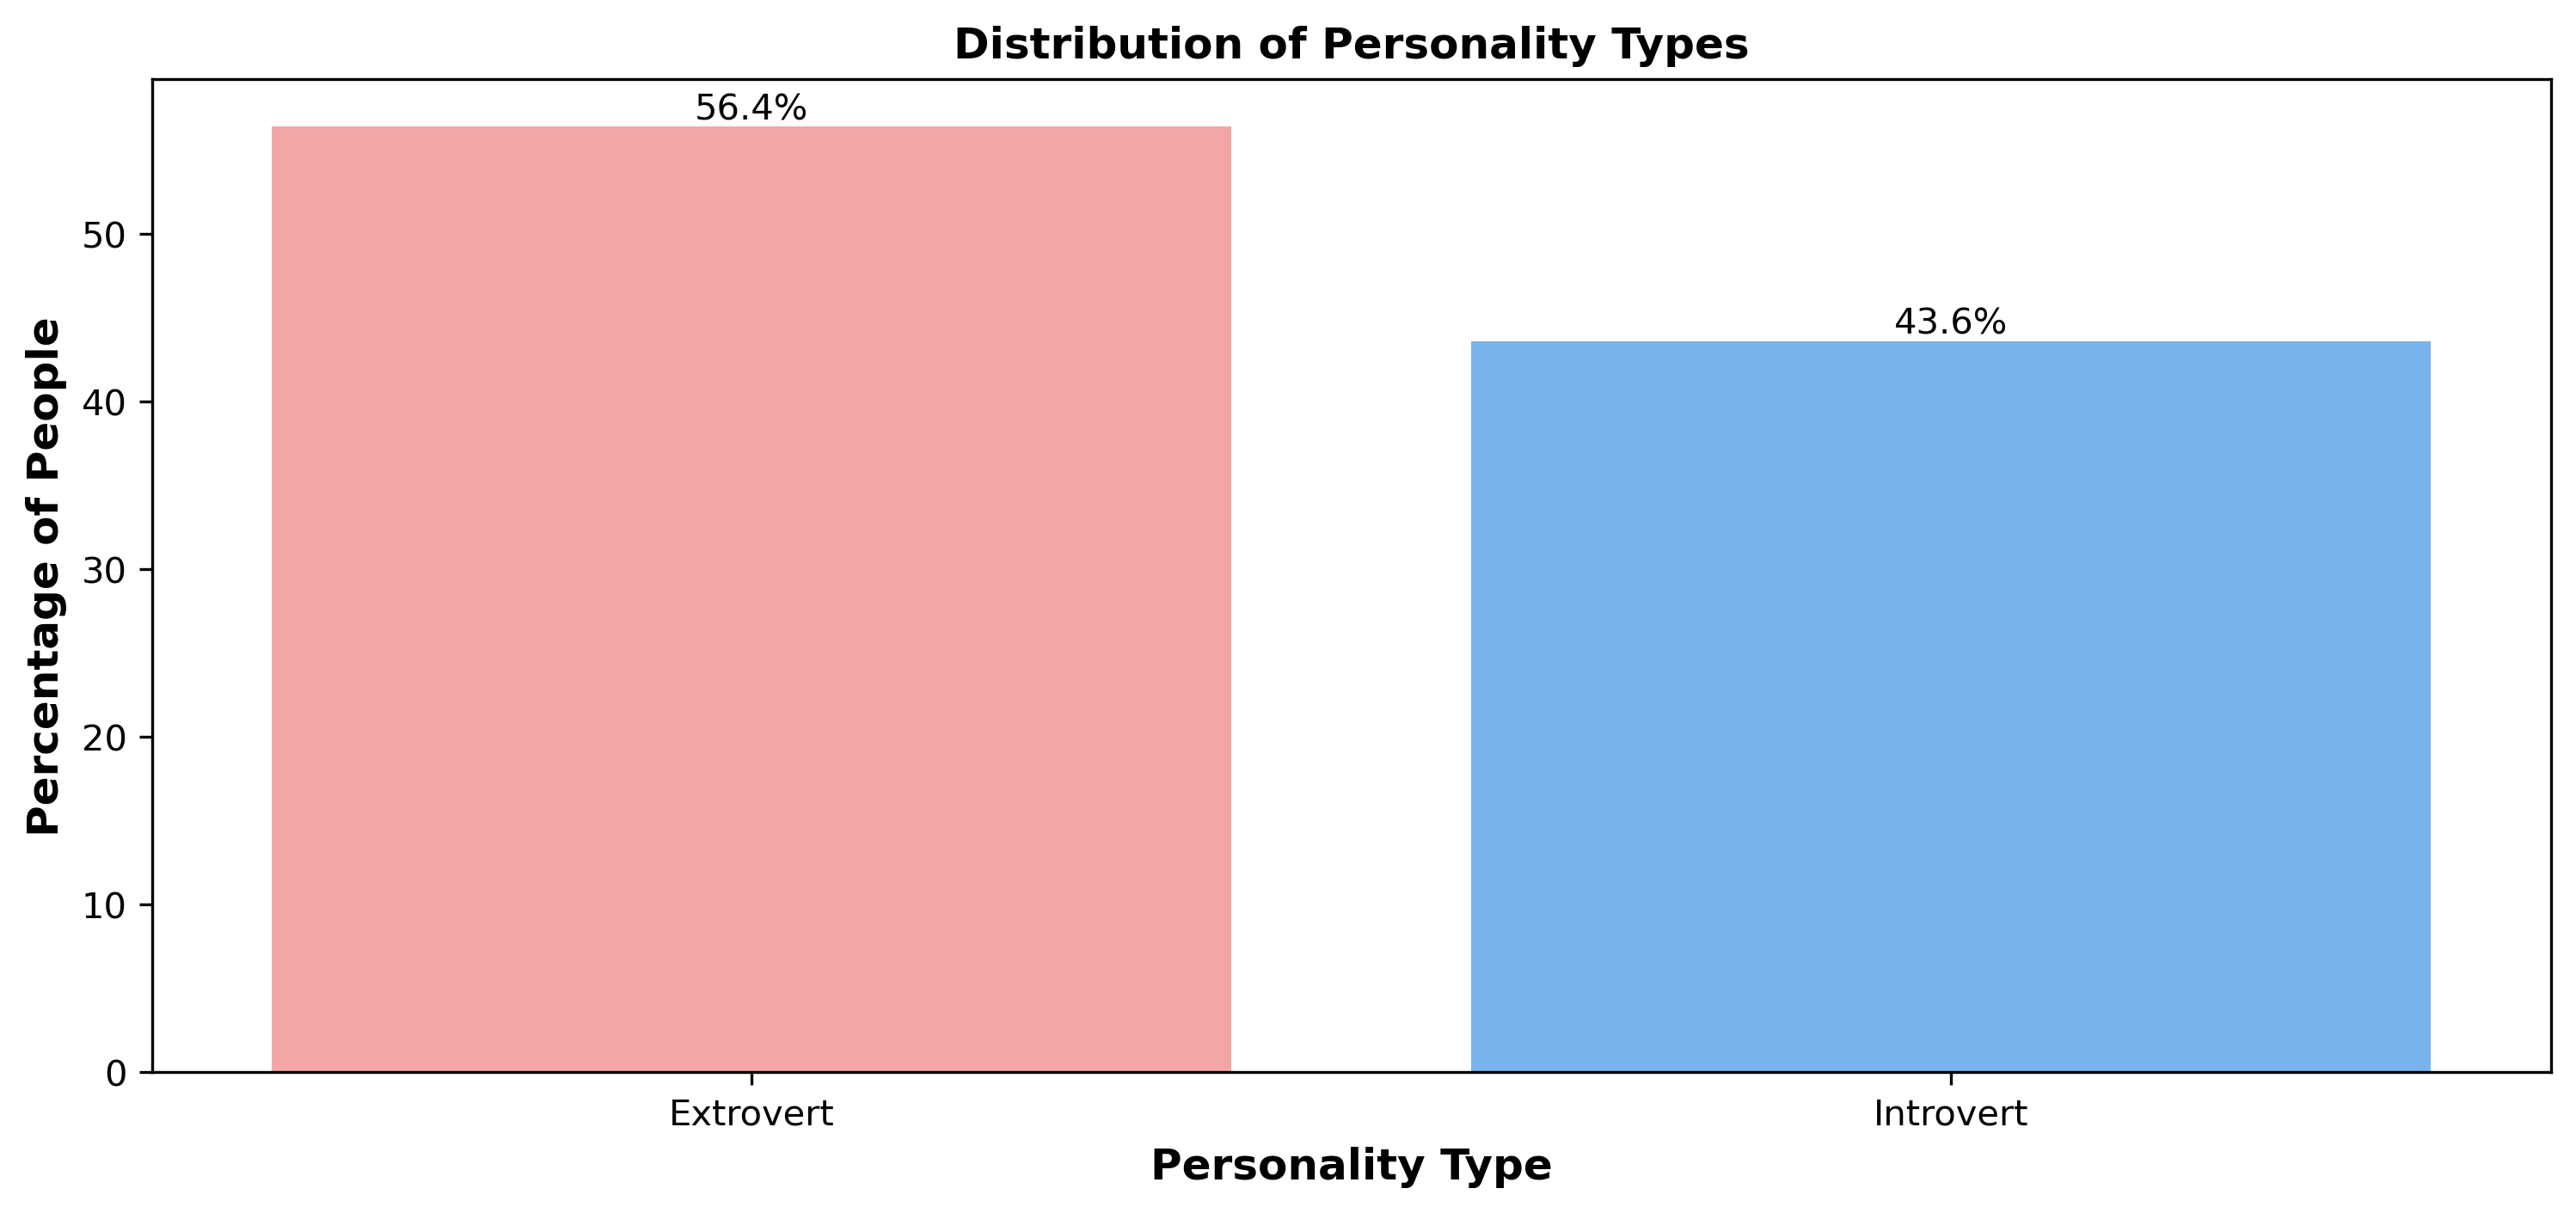

In [13]:
# Checking what is the distribution of introverts vs. extroverts in the dataset
ax = sns.countplot(
    data = df,
    stat = "percent",
    x = "personality",
    hue = "personality",
    palette = ["#FF9999", "#66B3FF"]
)

# Annotating bars
for i in range(len(ax.containers)):
    ax.bar_label(
        container = ax.containers[i], 
        fmt = lambda value: f"{value:0.1f}%"
    )

# Adding title and axis labels to the plot
plt.title("Distribution of Personality Types")
plt.xlabel("Personality Type")
plt.ylabel("Percentage of People");

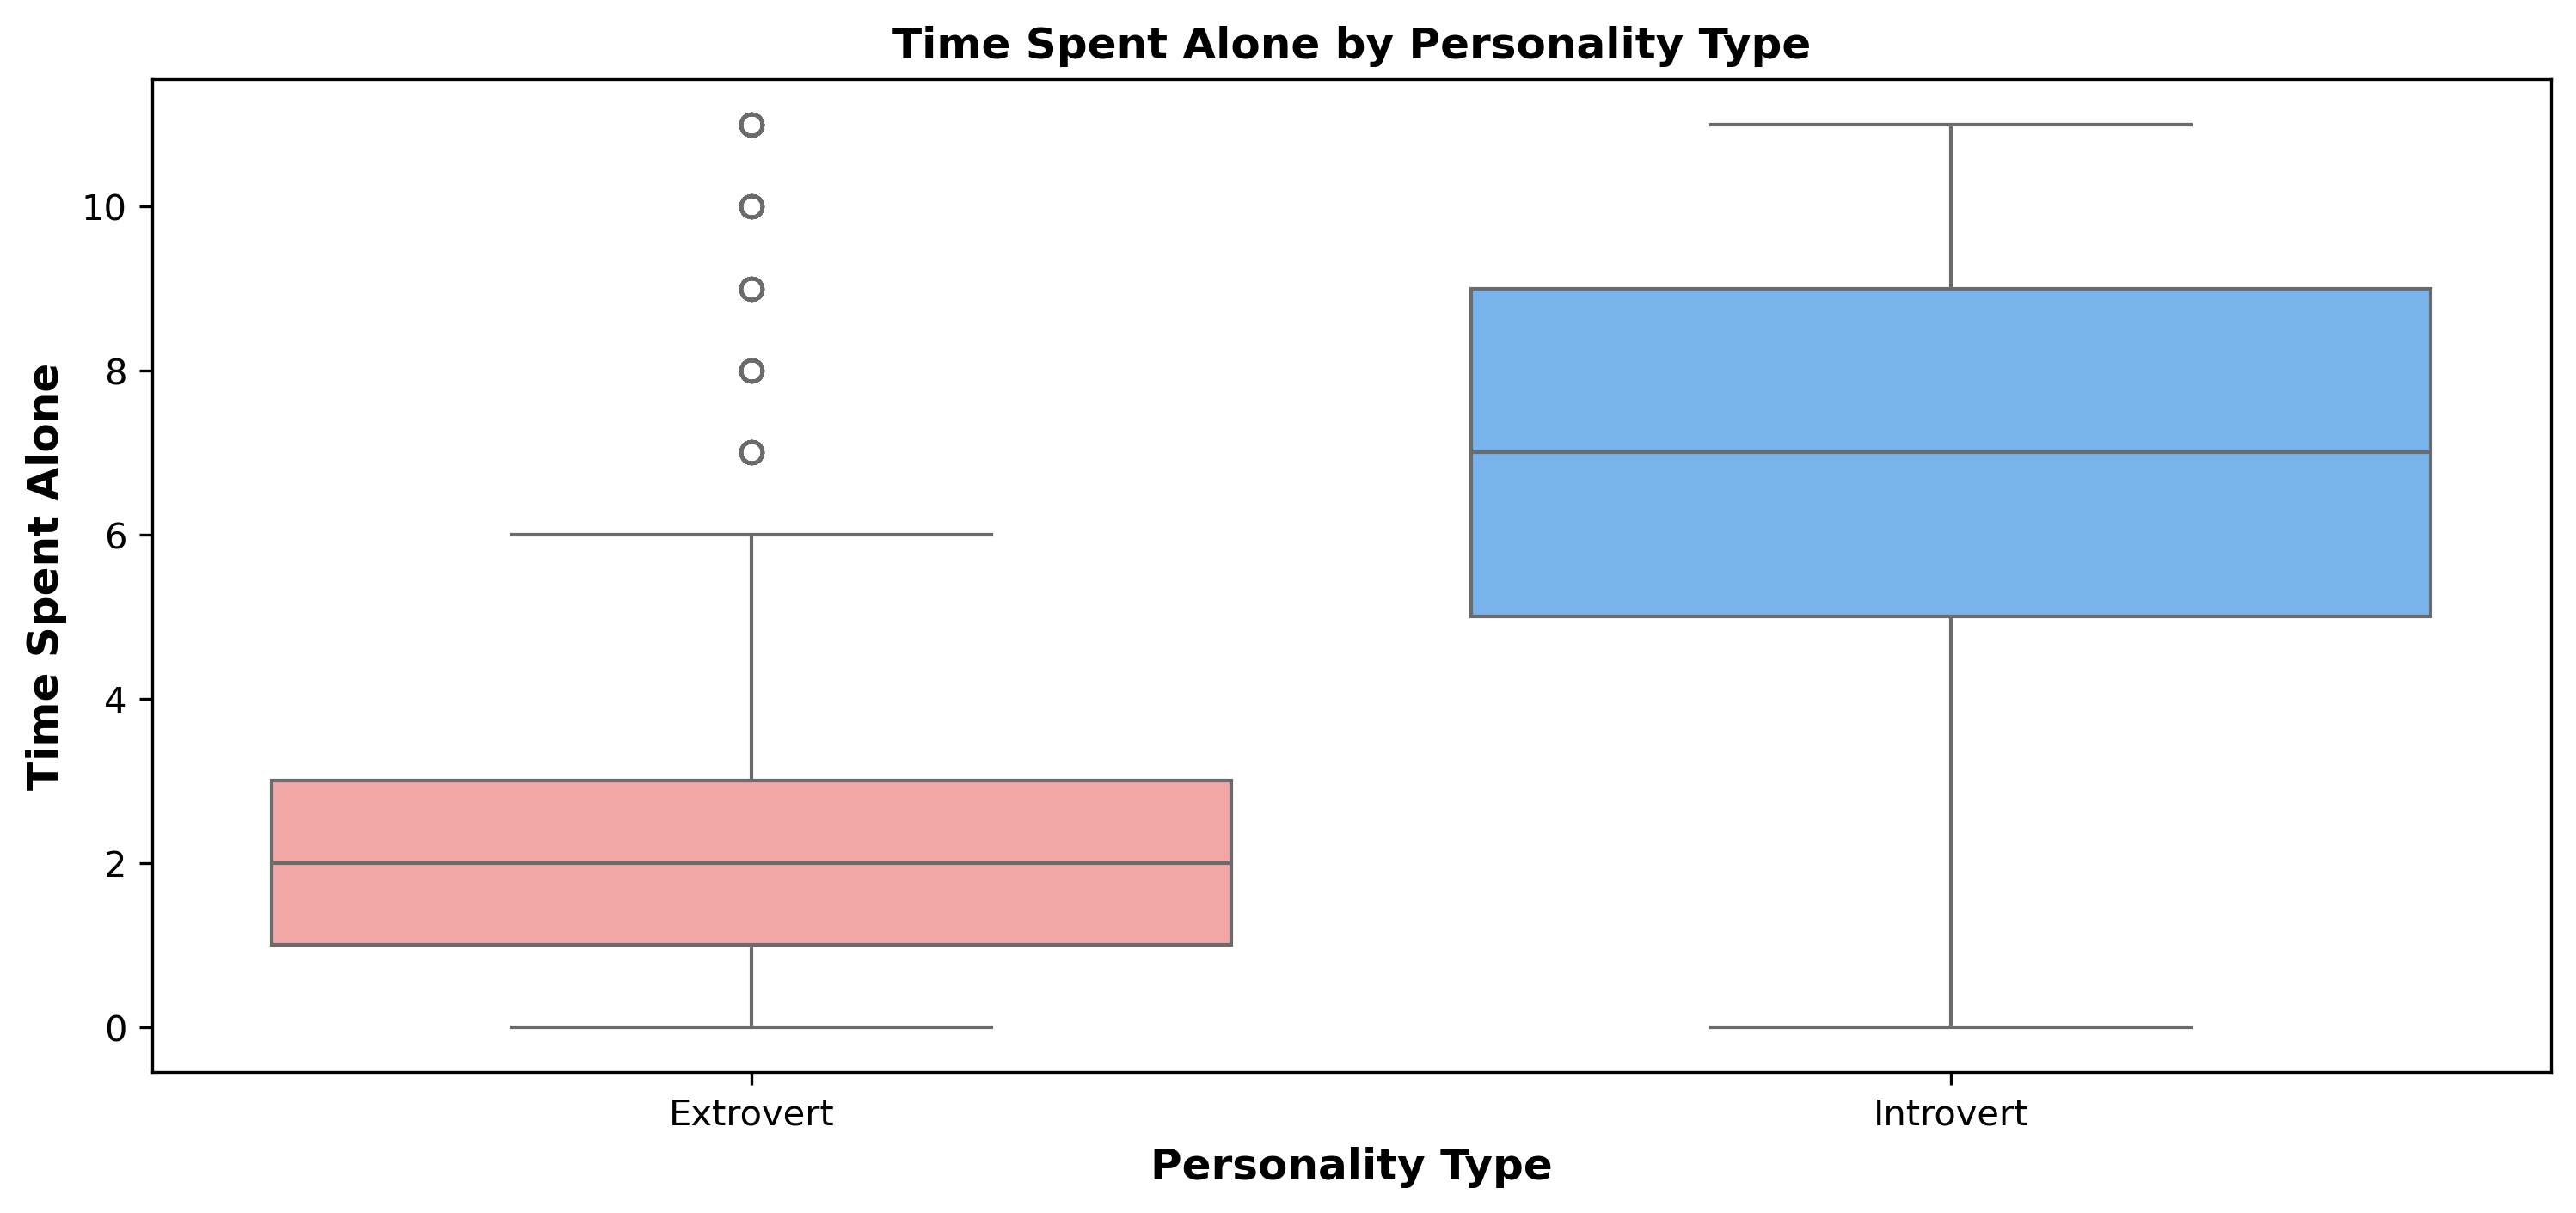

In [14]:
# Checking how do introverts and extroverts differ in time spent alone
sns.boxplot(
    data = df,
    x = "personality",
    y = "time_spent_alone",
    hue = "personality",
    palette = ["#FF9999", "#66B3FF"]
)

# Adding title and axis labels to the plot
plt.title("Time Spent Alone by Personality Type")
plt.xlabel("Personality Type")
plt.ylabel("Time Spent Alone");

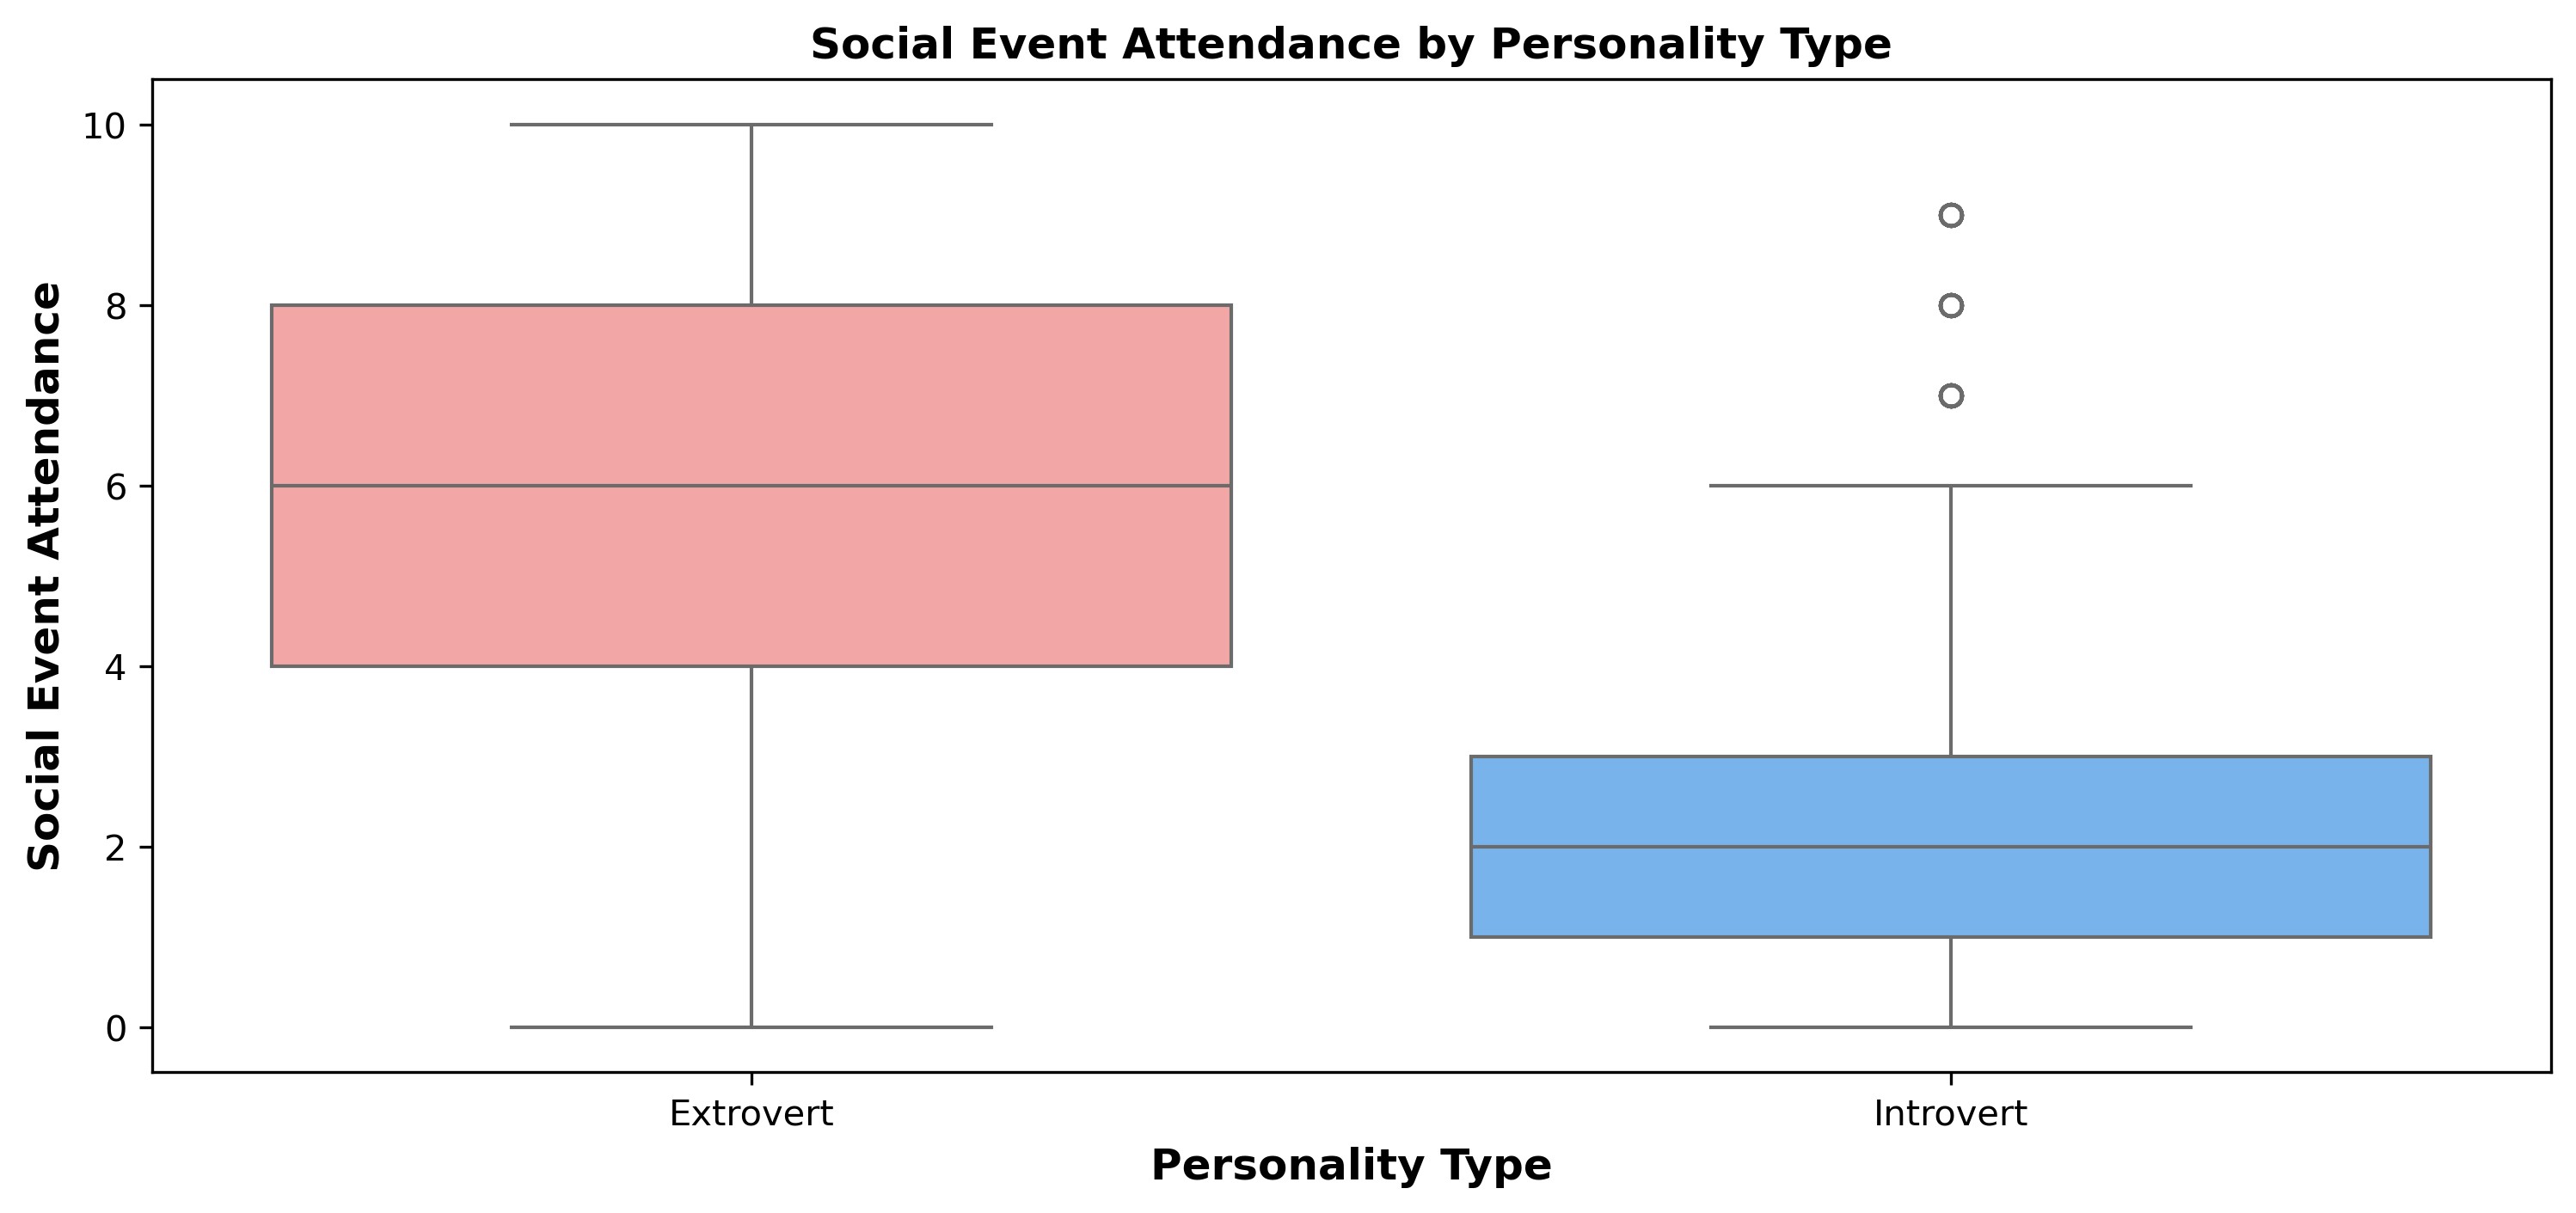

In [15]:
# Checking what is the relationship between social event attendance and personality type
sns.boxplot(
    data = df,
    x = "personality",
    y = "social_event_attendance",
    hue = "personality",
    palette = ["#FF9999", "#66B3FF"]
)

# Adding title and axis labels to the plot
plt.title("Social Event Attendance by Personality Type")
plt.xlabel("Personality Type")
plt.ylabel("Social Event Attendance");

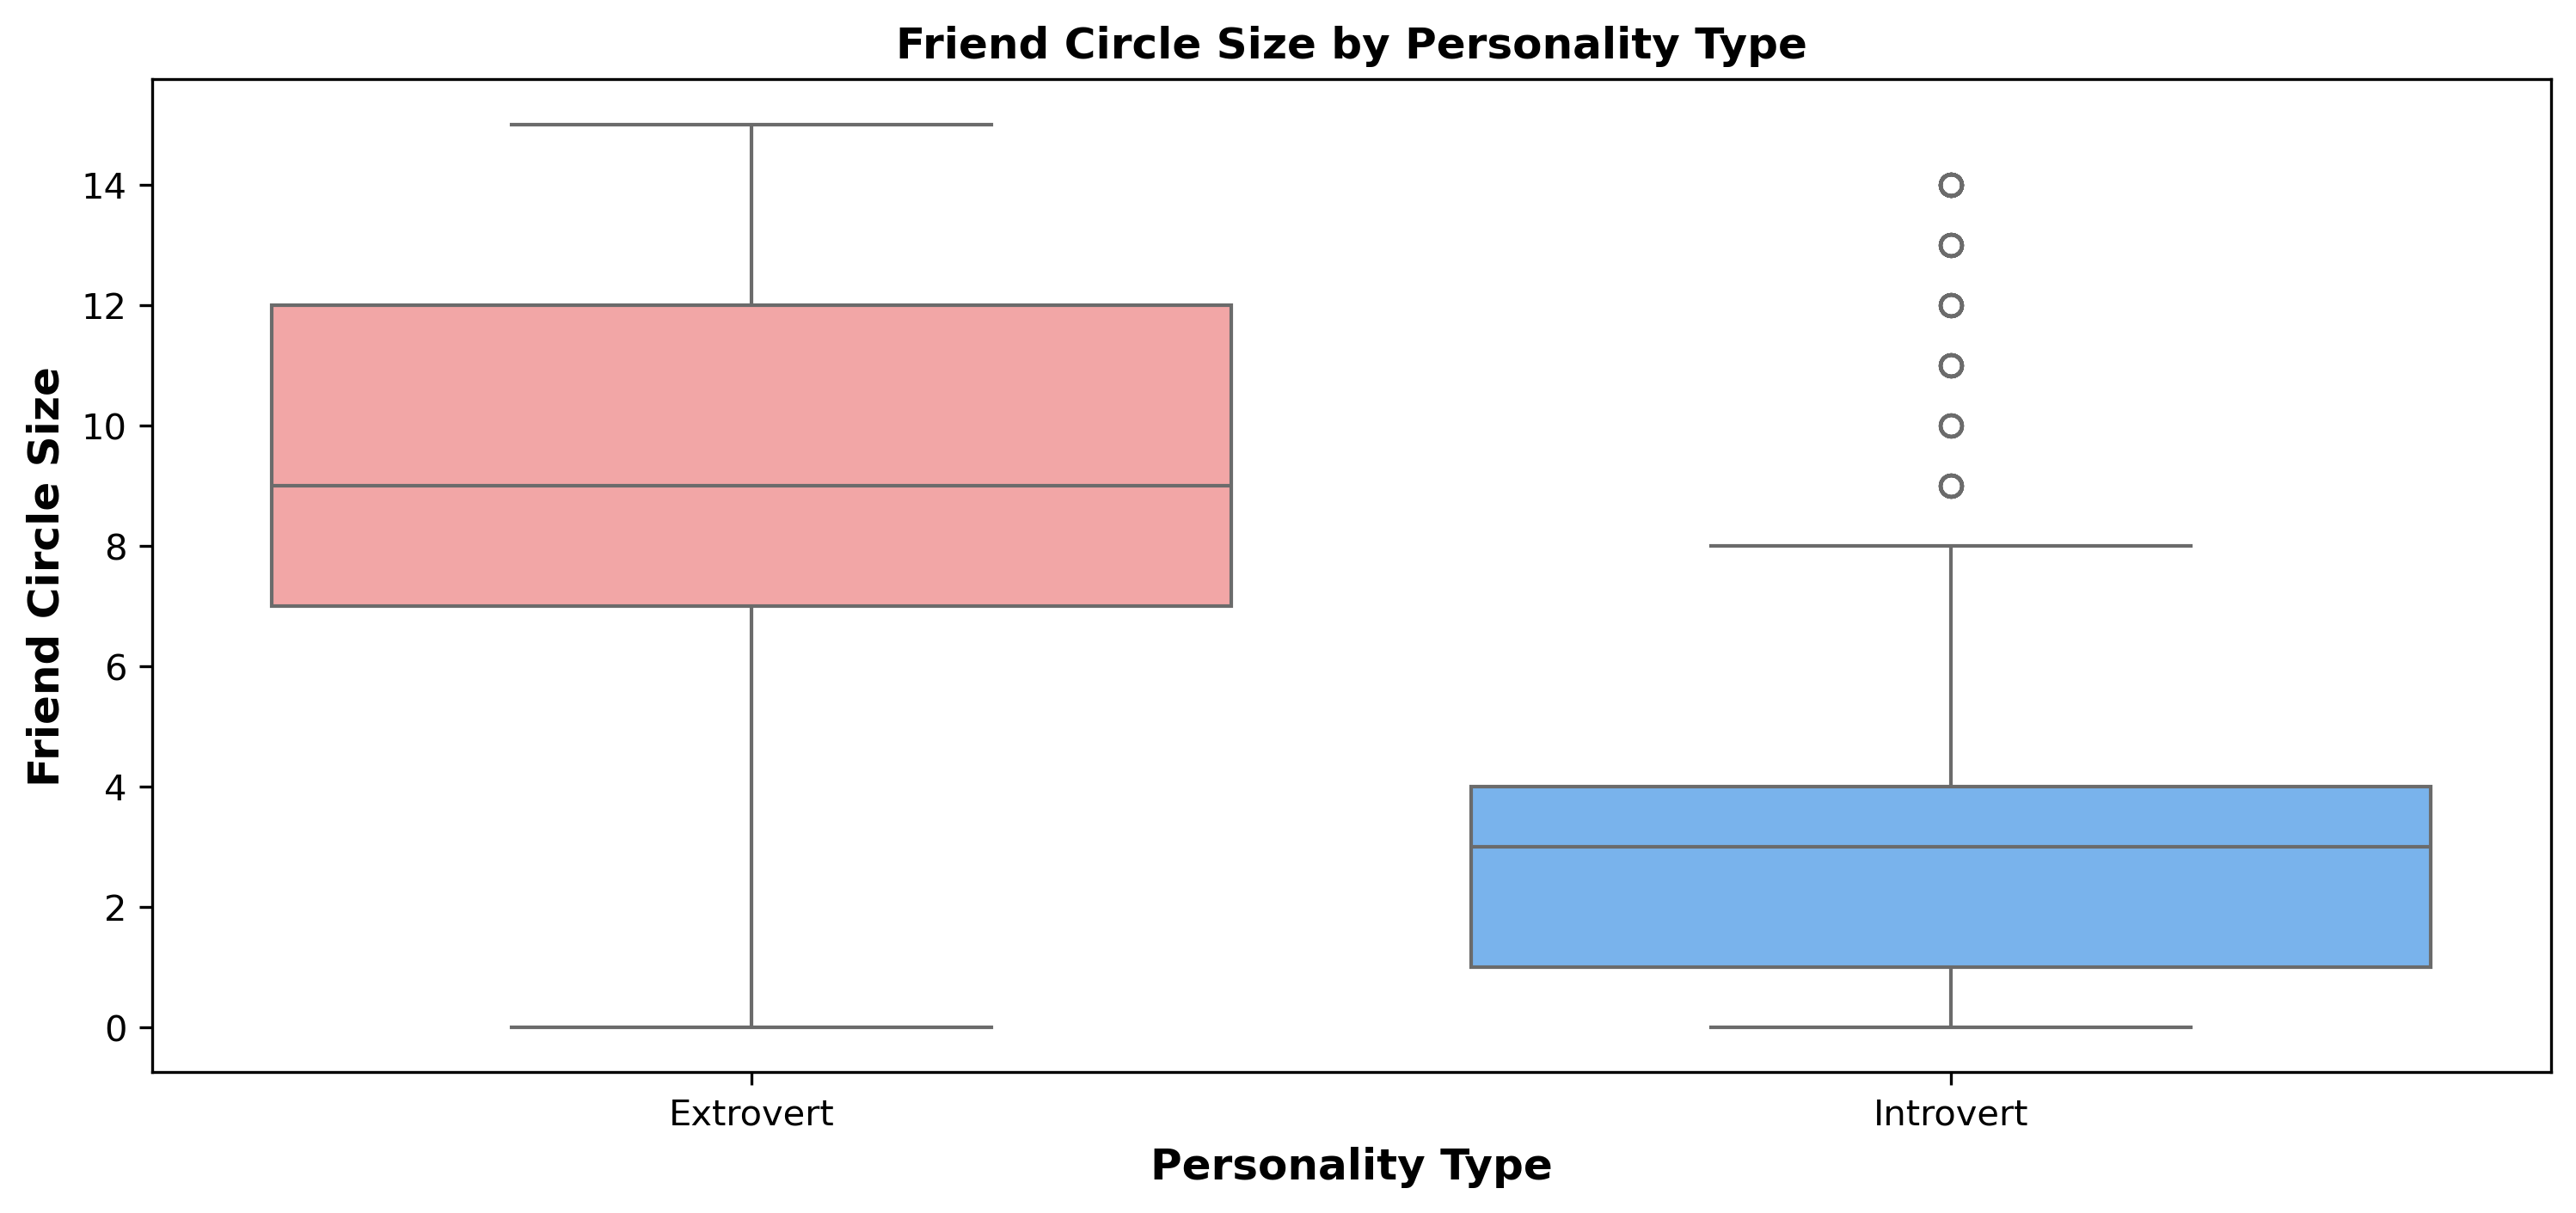

In [16]:
# Checking whether introverts and extroverts differ in the size of their friends circle
sns.boxplot(
    data = df,
    x = "personality",
    y = "friends_circle_size",
    hue = "personality",
    palette = ["#FF9999", "#66B3FF"]
)

# Adding title and axis labels to the plot
plt.title("Friend Circle Size by Personality Type")
plt.xlabel("Personality Type")
plt.ylabel("Friend Circle Size");

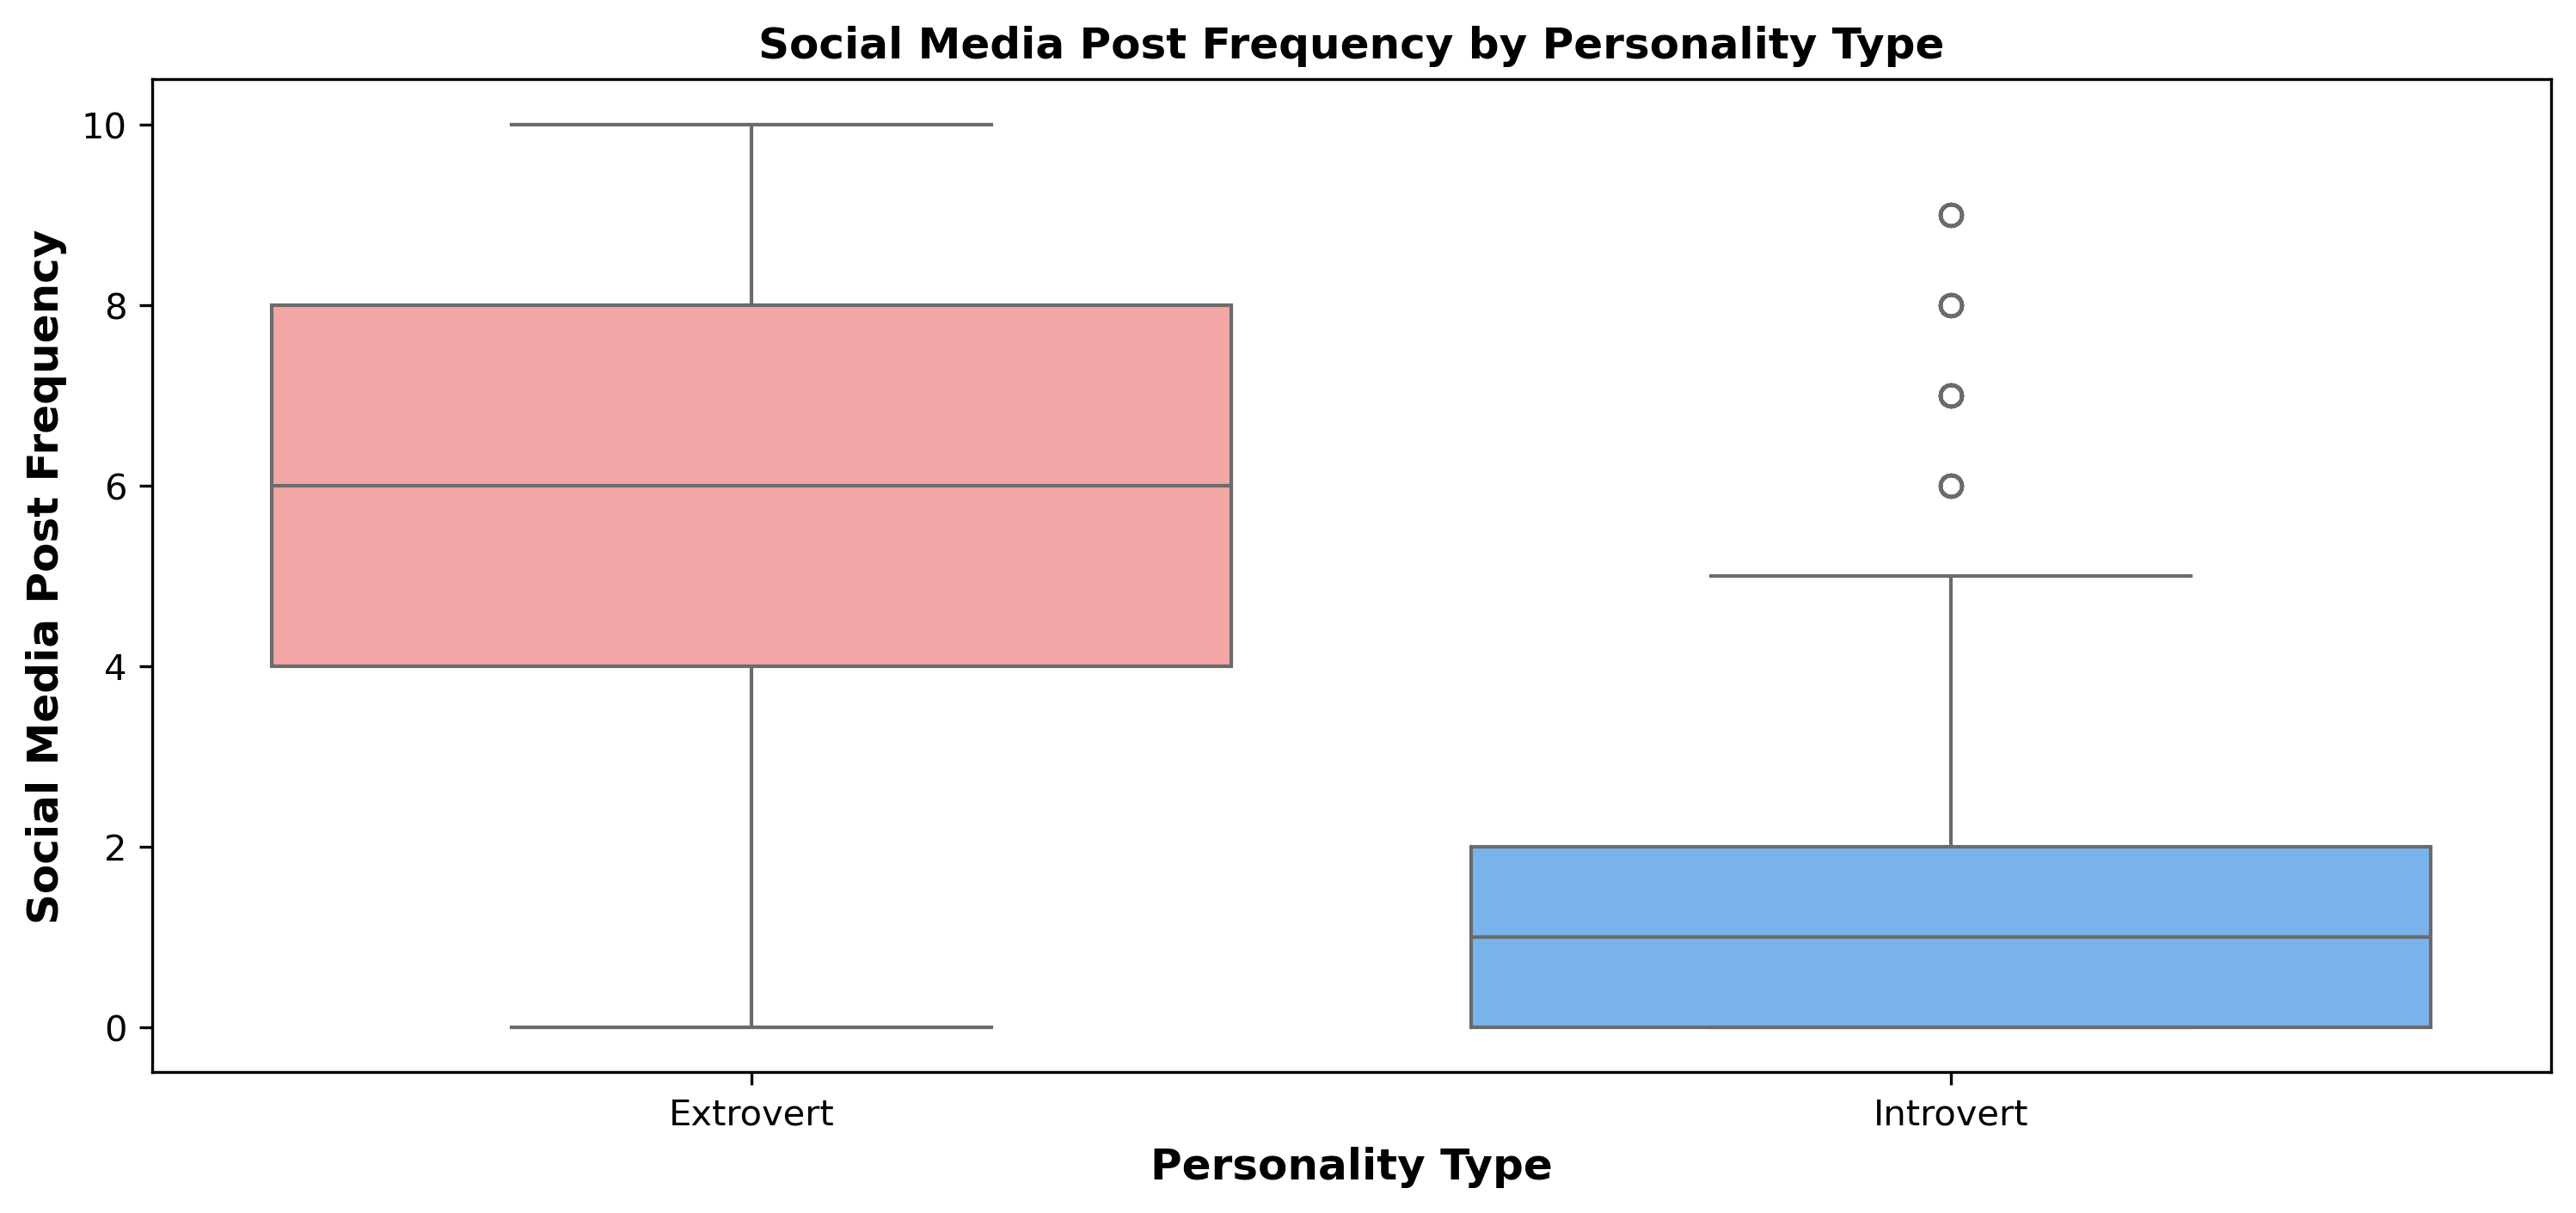

In [17]:
# Checking how does the frequency of social media posts relate to personality type
sns.boxplot(
    data = df,
    x = "personality",
    y = "post_frequency",
    hue = "personality",
    palette = ["#FF9999", "#66B3FF"]
)

# Adding title and axis labels to the plot
plt.title("Social Media Post Frequency by Personality Type")
plt.xlabel("Personality Type")
plt.ylabel("Social Media Post Frequency");

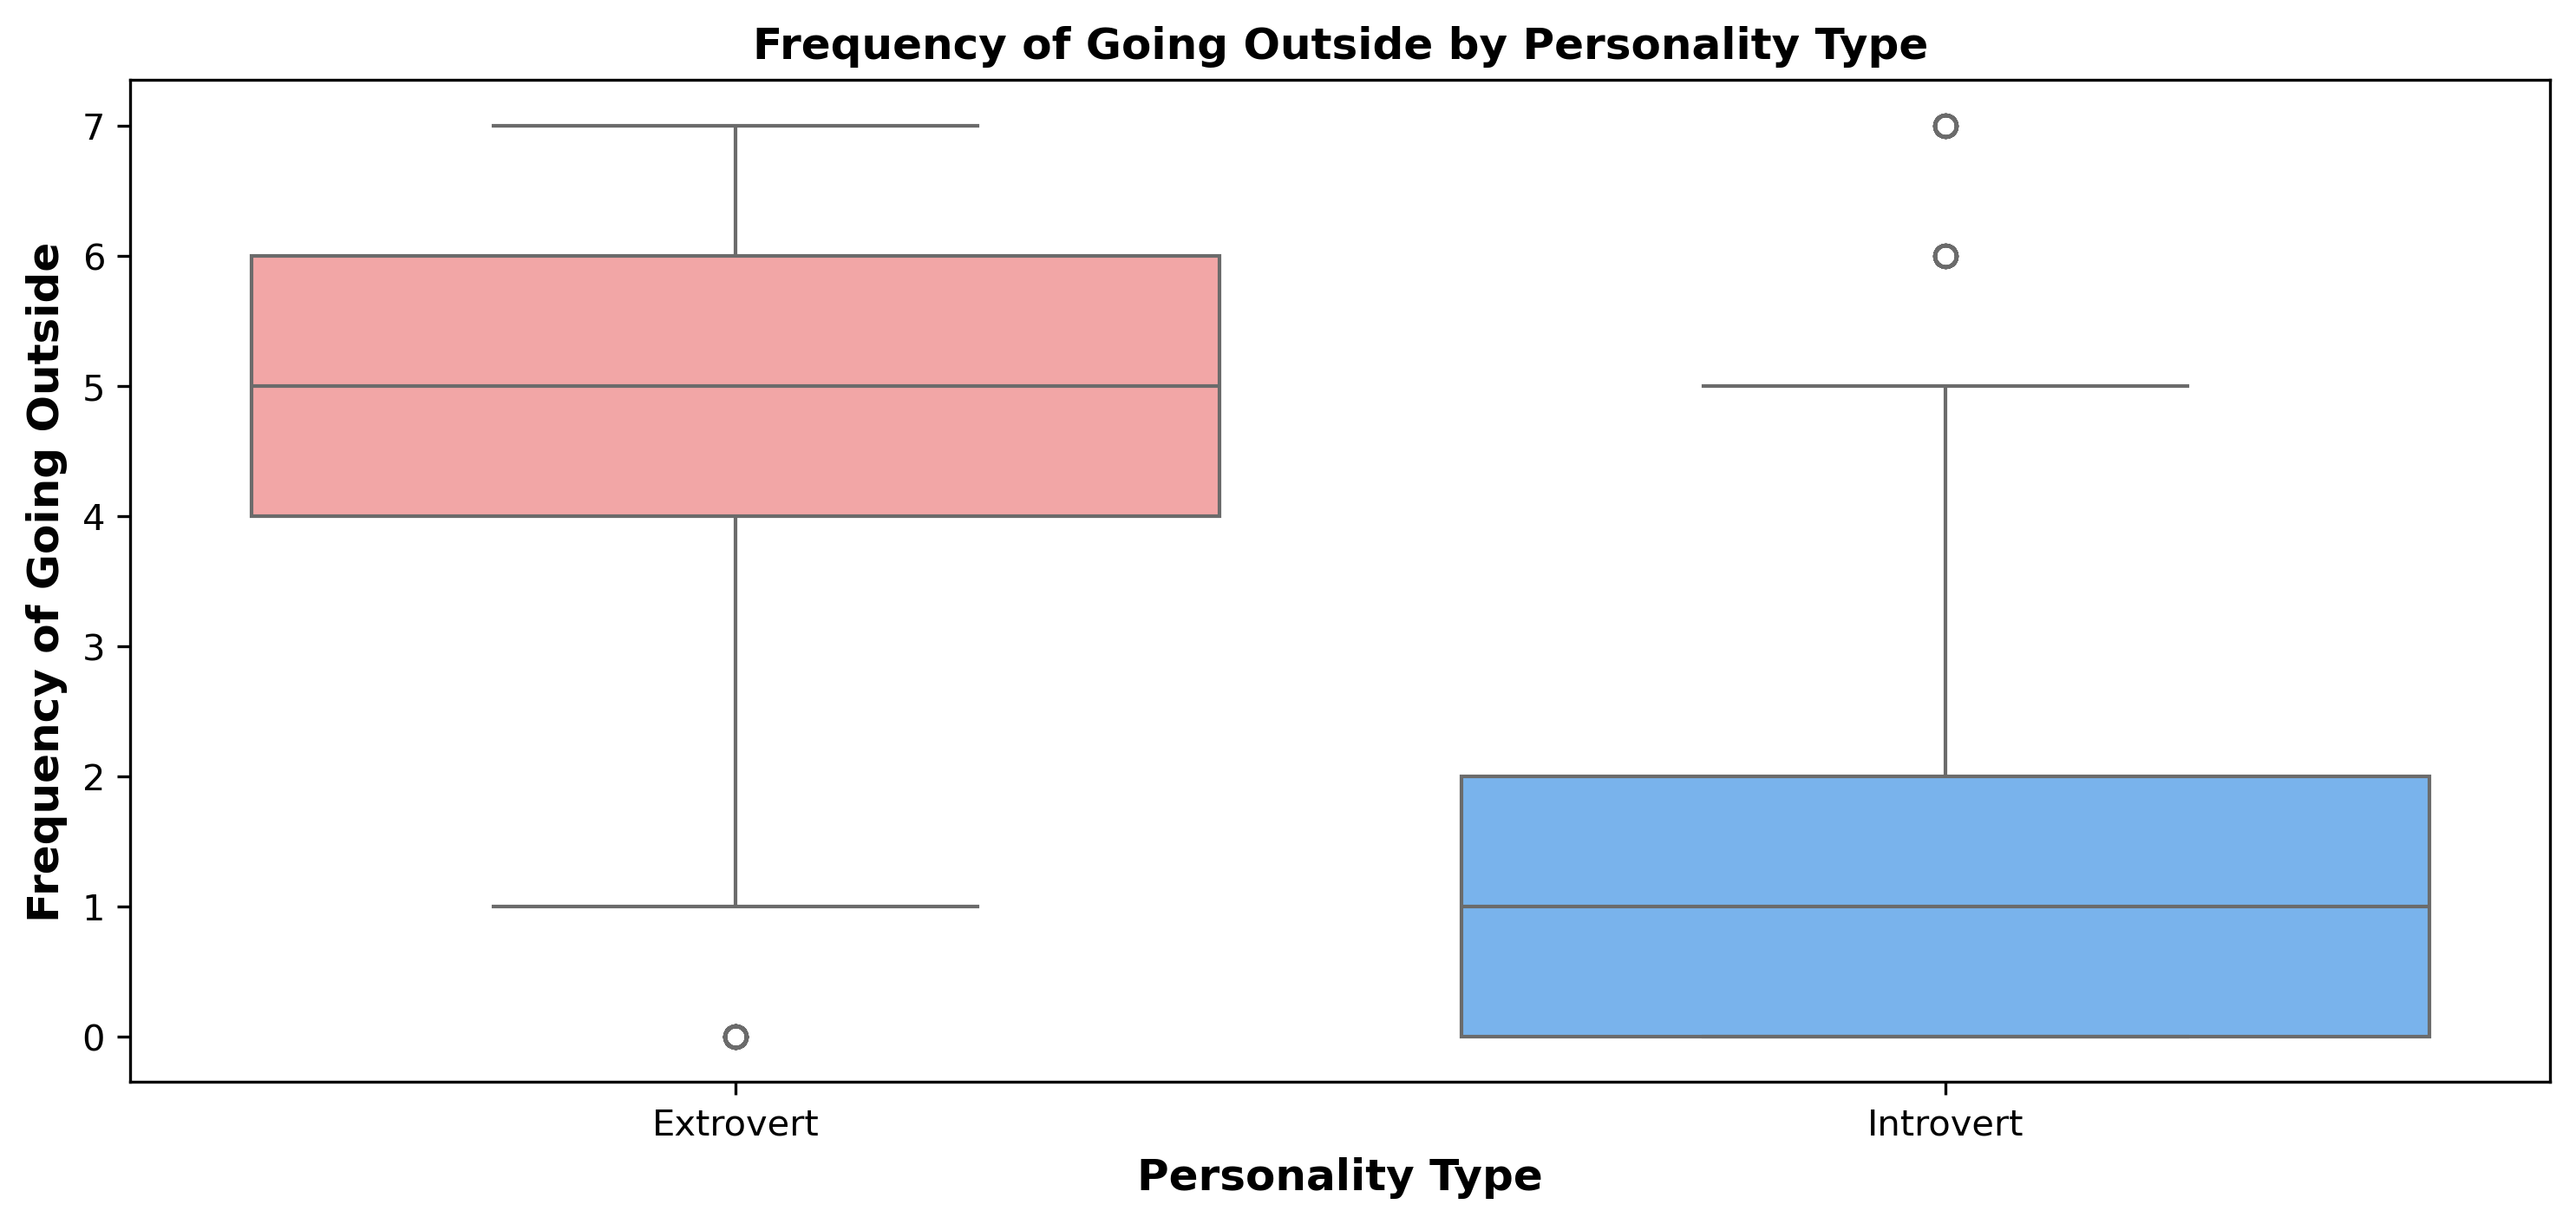

In [18]:
# Checking do introverts go outside less frequently than extroverts
sns.boxplot(
    data = df,
    x = "personality",
    y = "going_outside",
    hue = "personality",
    palette = ["#FF9999", "#66B3FF"]
)

# Adding title and axis labels to the plot
plt.title("Frequency of Going Outside by Personality Type")
plt.xlabel("Personality Type")
plt.ylabel("Frequency of Going Outside");

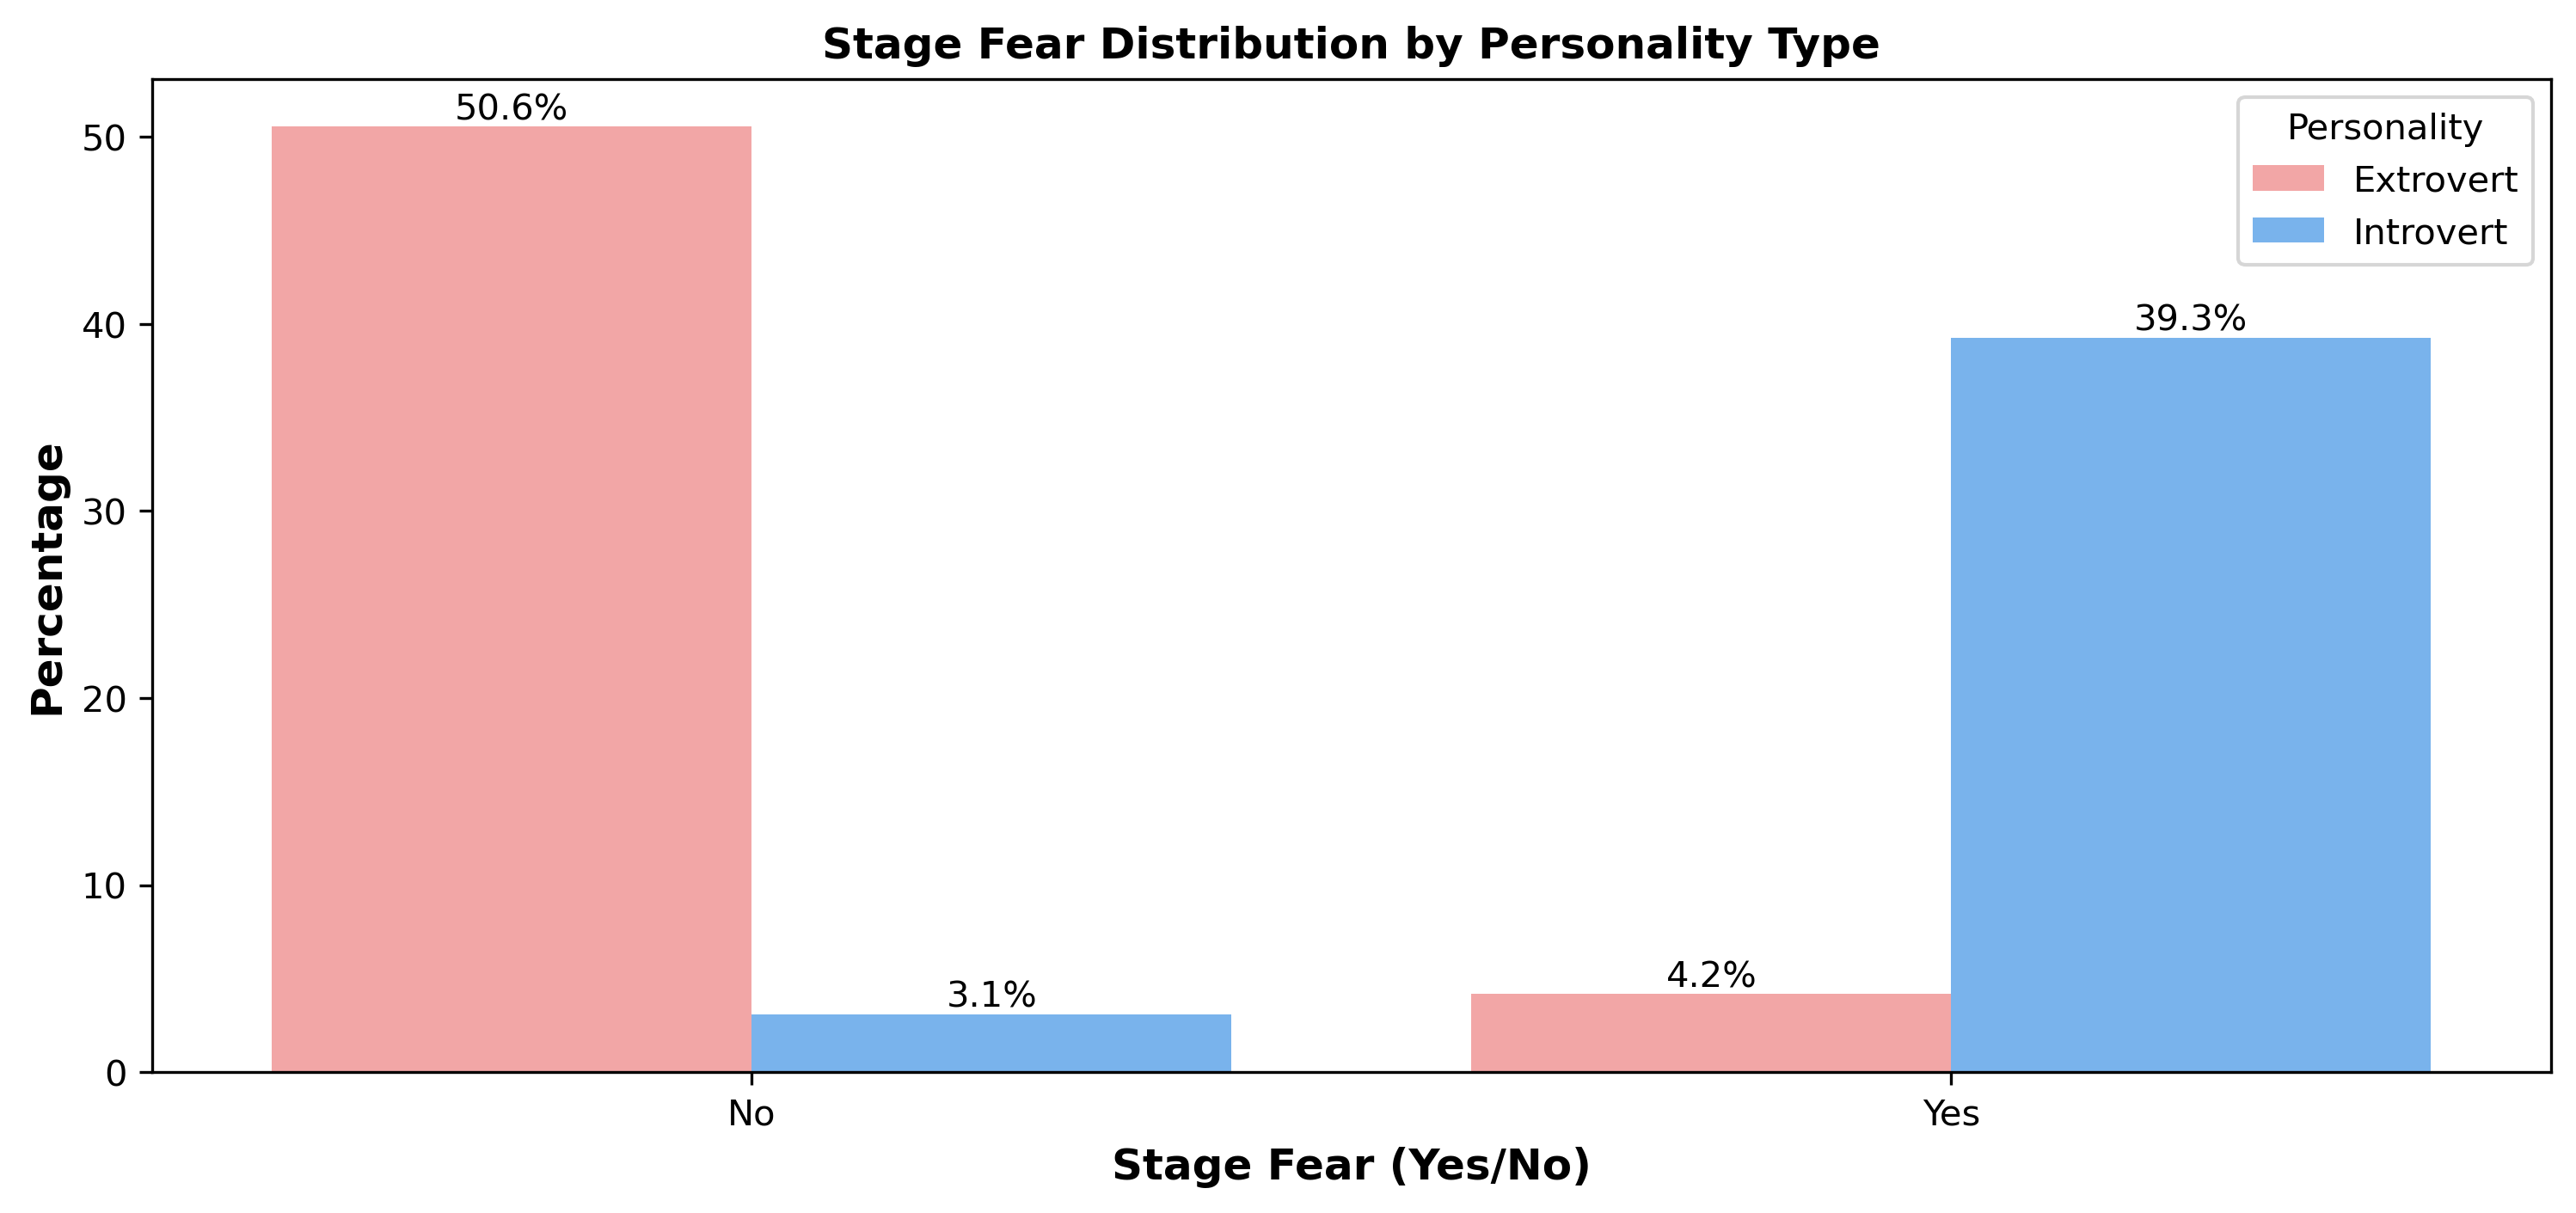

In [19]:
# Checking whether stage fear occur more frequently among introverts
ax = sns.countplot(
    data = df, 
    stat = "percent",
    x = "stage_fear",
    hue = "personality", 
    palette = ["#FF9999", "#66B3FF"]
)

# Annotating bars
for i in range(len(ax.containers)):
    ax.bar_label(
        container = ax.containers[i], 
        fmt = lambda value: f"{value:0.1f}%"
    )

# Adding title and axis labels to the plot
plt.title("Stage Fear Distribution by Personality Type")
plt.xlabel("Stage Fear (Yes/No)")
plt.ylabel("Percentage")
plt.legend(title='Personality');

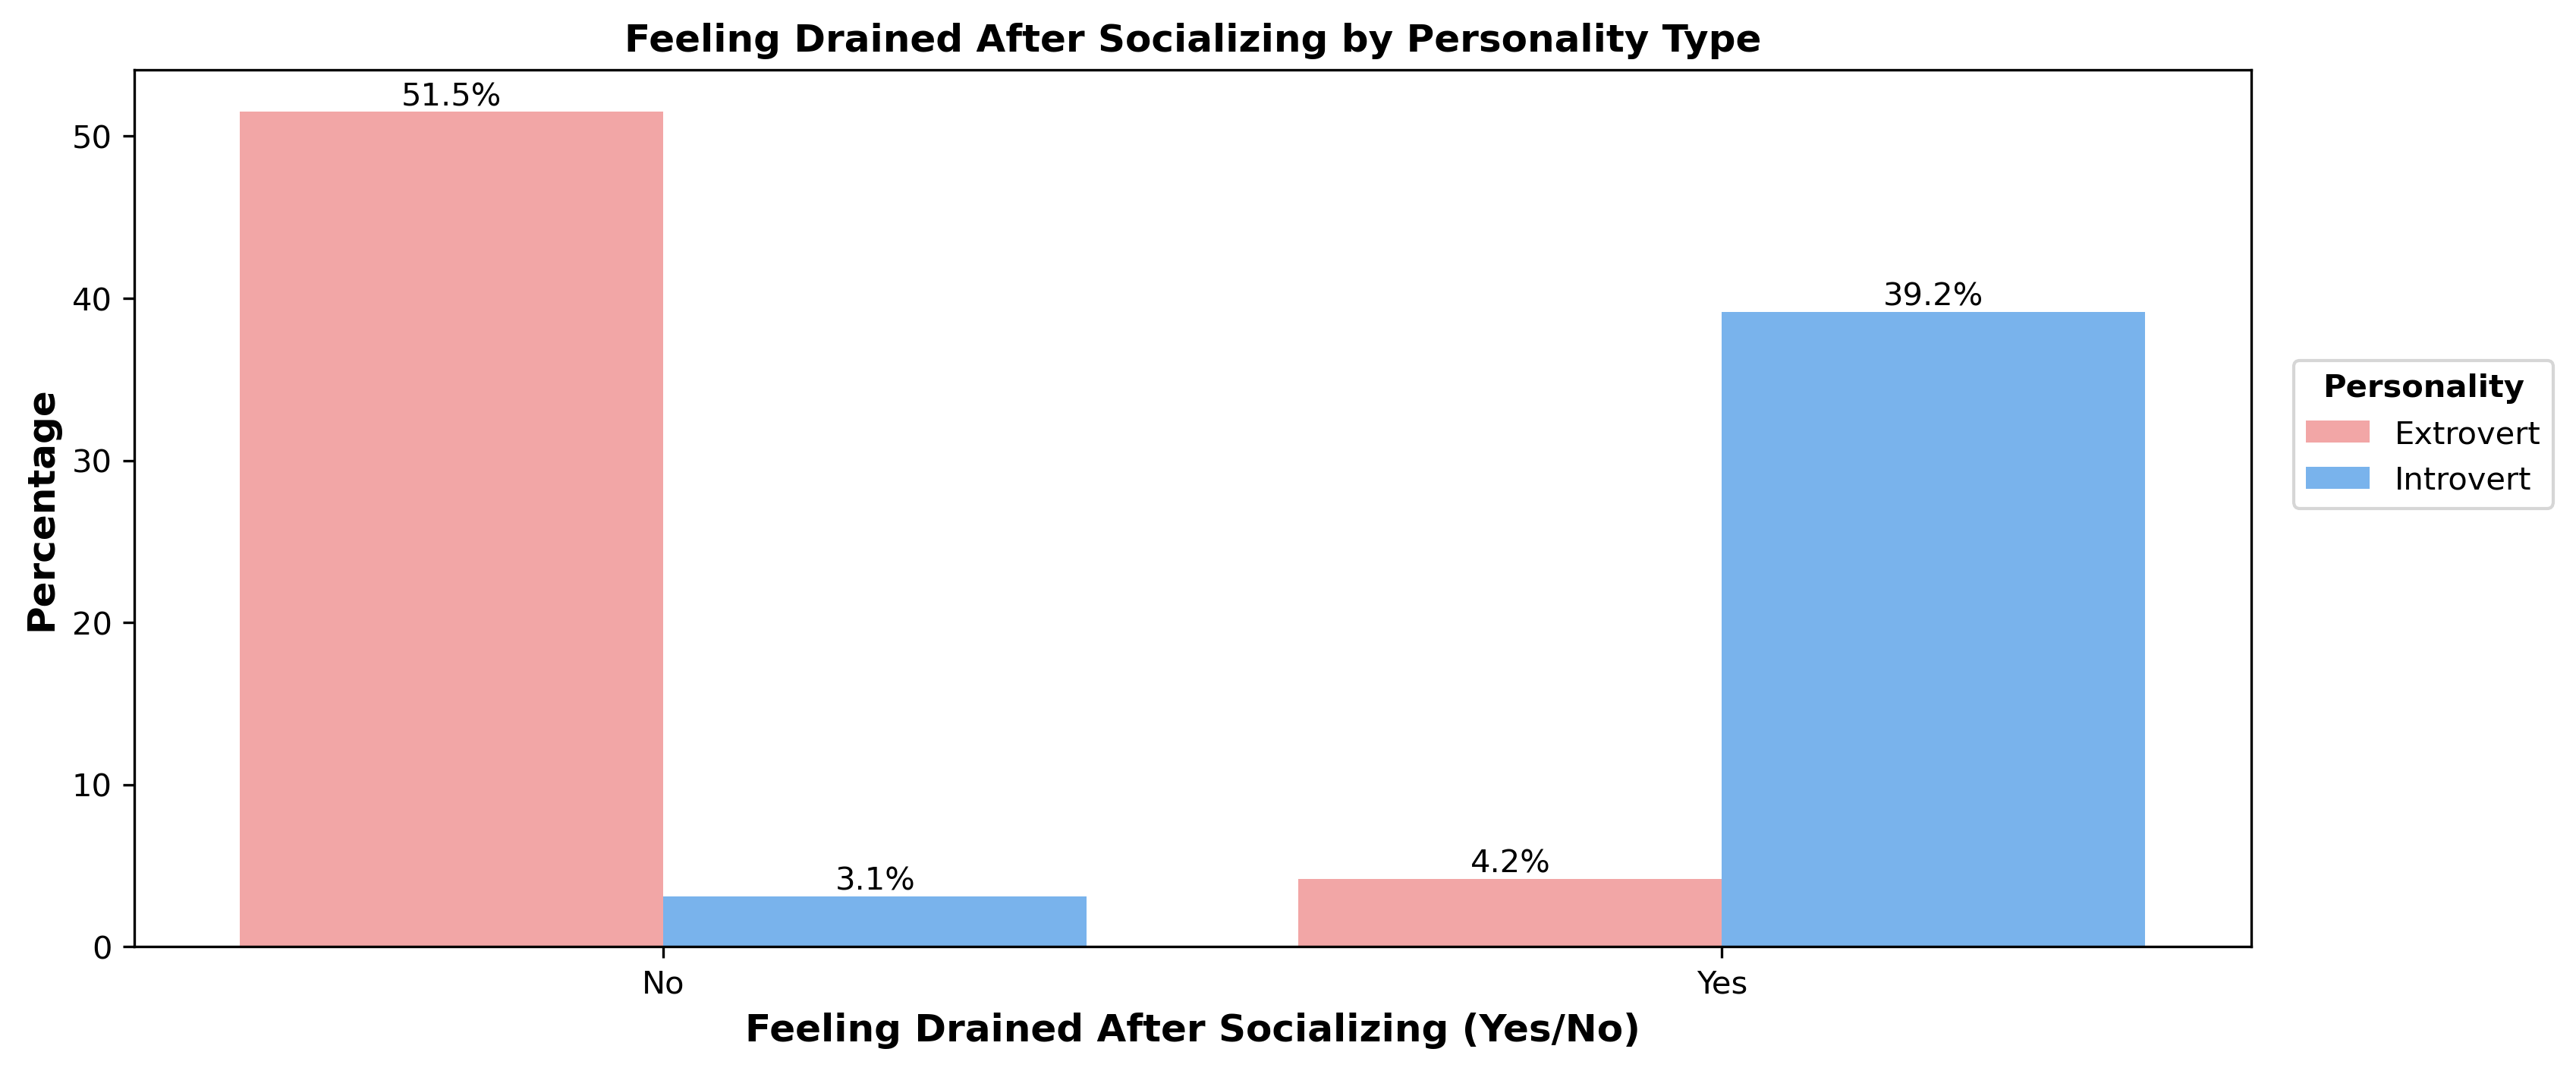

In [20]:
# Checking whether introverts report higher exhaustion after social interaction
ax = sns.countplot(
    data = df, 
    stat = "percent",
    x = "drained_after_socializing",
    hue = "personality", 
    palette = ["#FF9999", "#66B3FF"]
)

# Annotating bars
for i in range(len(ax.containers)):
    ax.bar_label(
        container = ax.containers[i], 
        fmt = lambda value: f"{value:0.1f}%"
    )

# Adding title and axis labels to the plot
plt.title("Feeling Drained After Socializing by Personality Type")
plt.xlabel("Feeling Drained After Socializing (Yes/No)")
plt.ylabel("Percentage")
plt.legend(title='Personality', loc = (1.02, 0.5), title_fontproperties = {'weight': 'bold'});

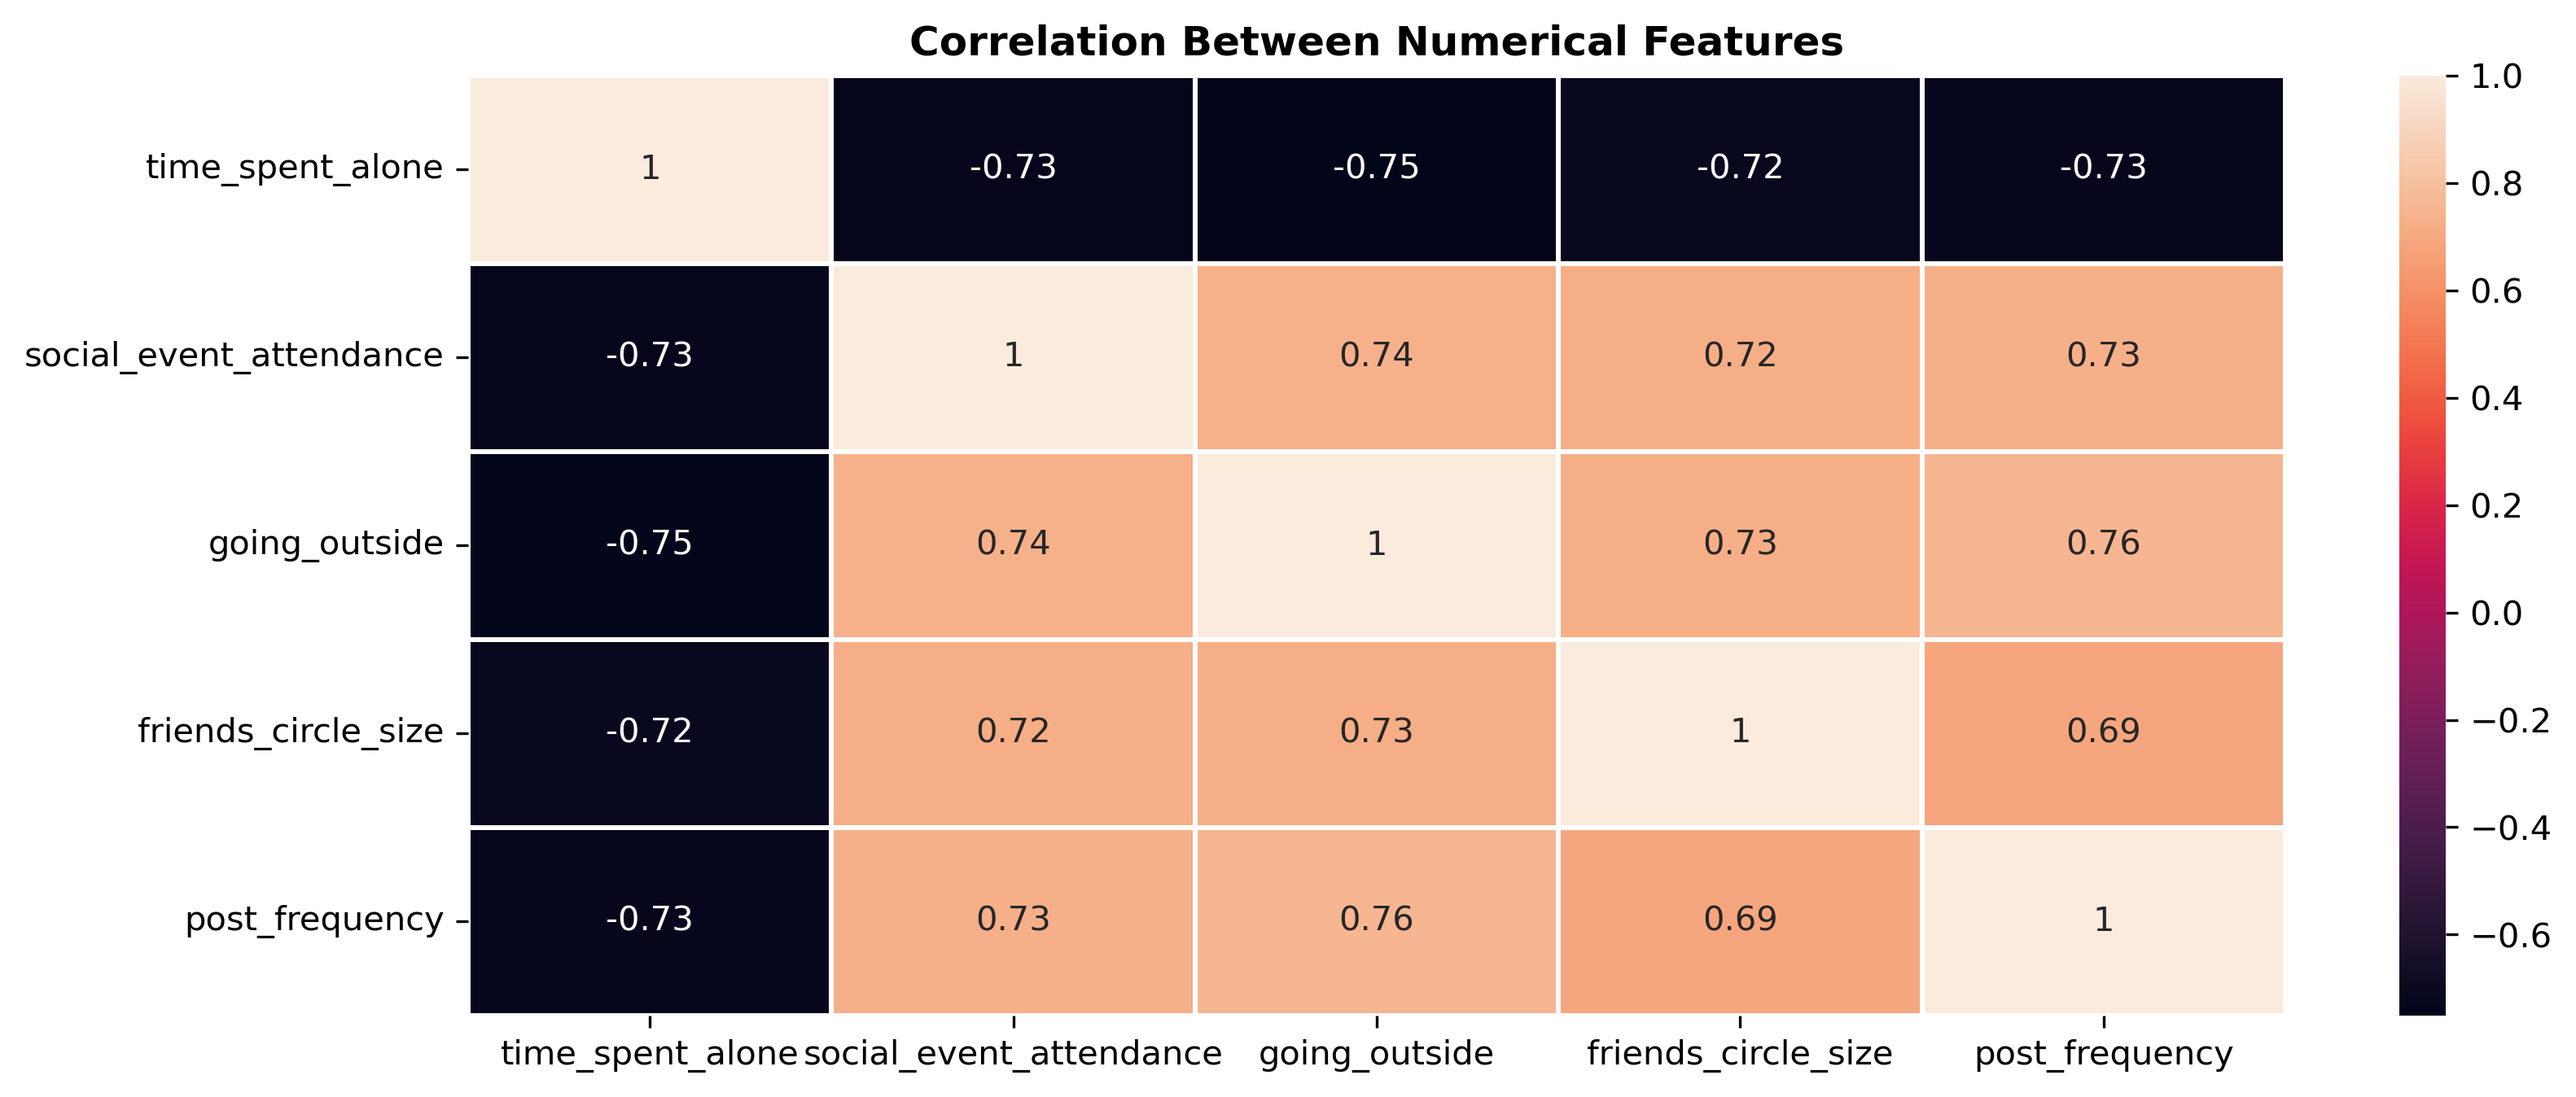

In [21]:
# Checking the correlation between numerical features
sns.heatmap(
    data = df.corr(numeric_only=True),
    annot = True,
    linewidths=1
)

# Adding title to the plot
plt.title("Correlation Between Numerical Features");

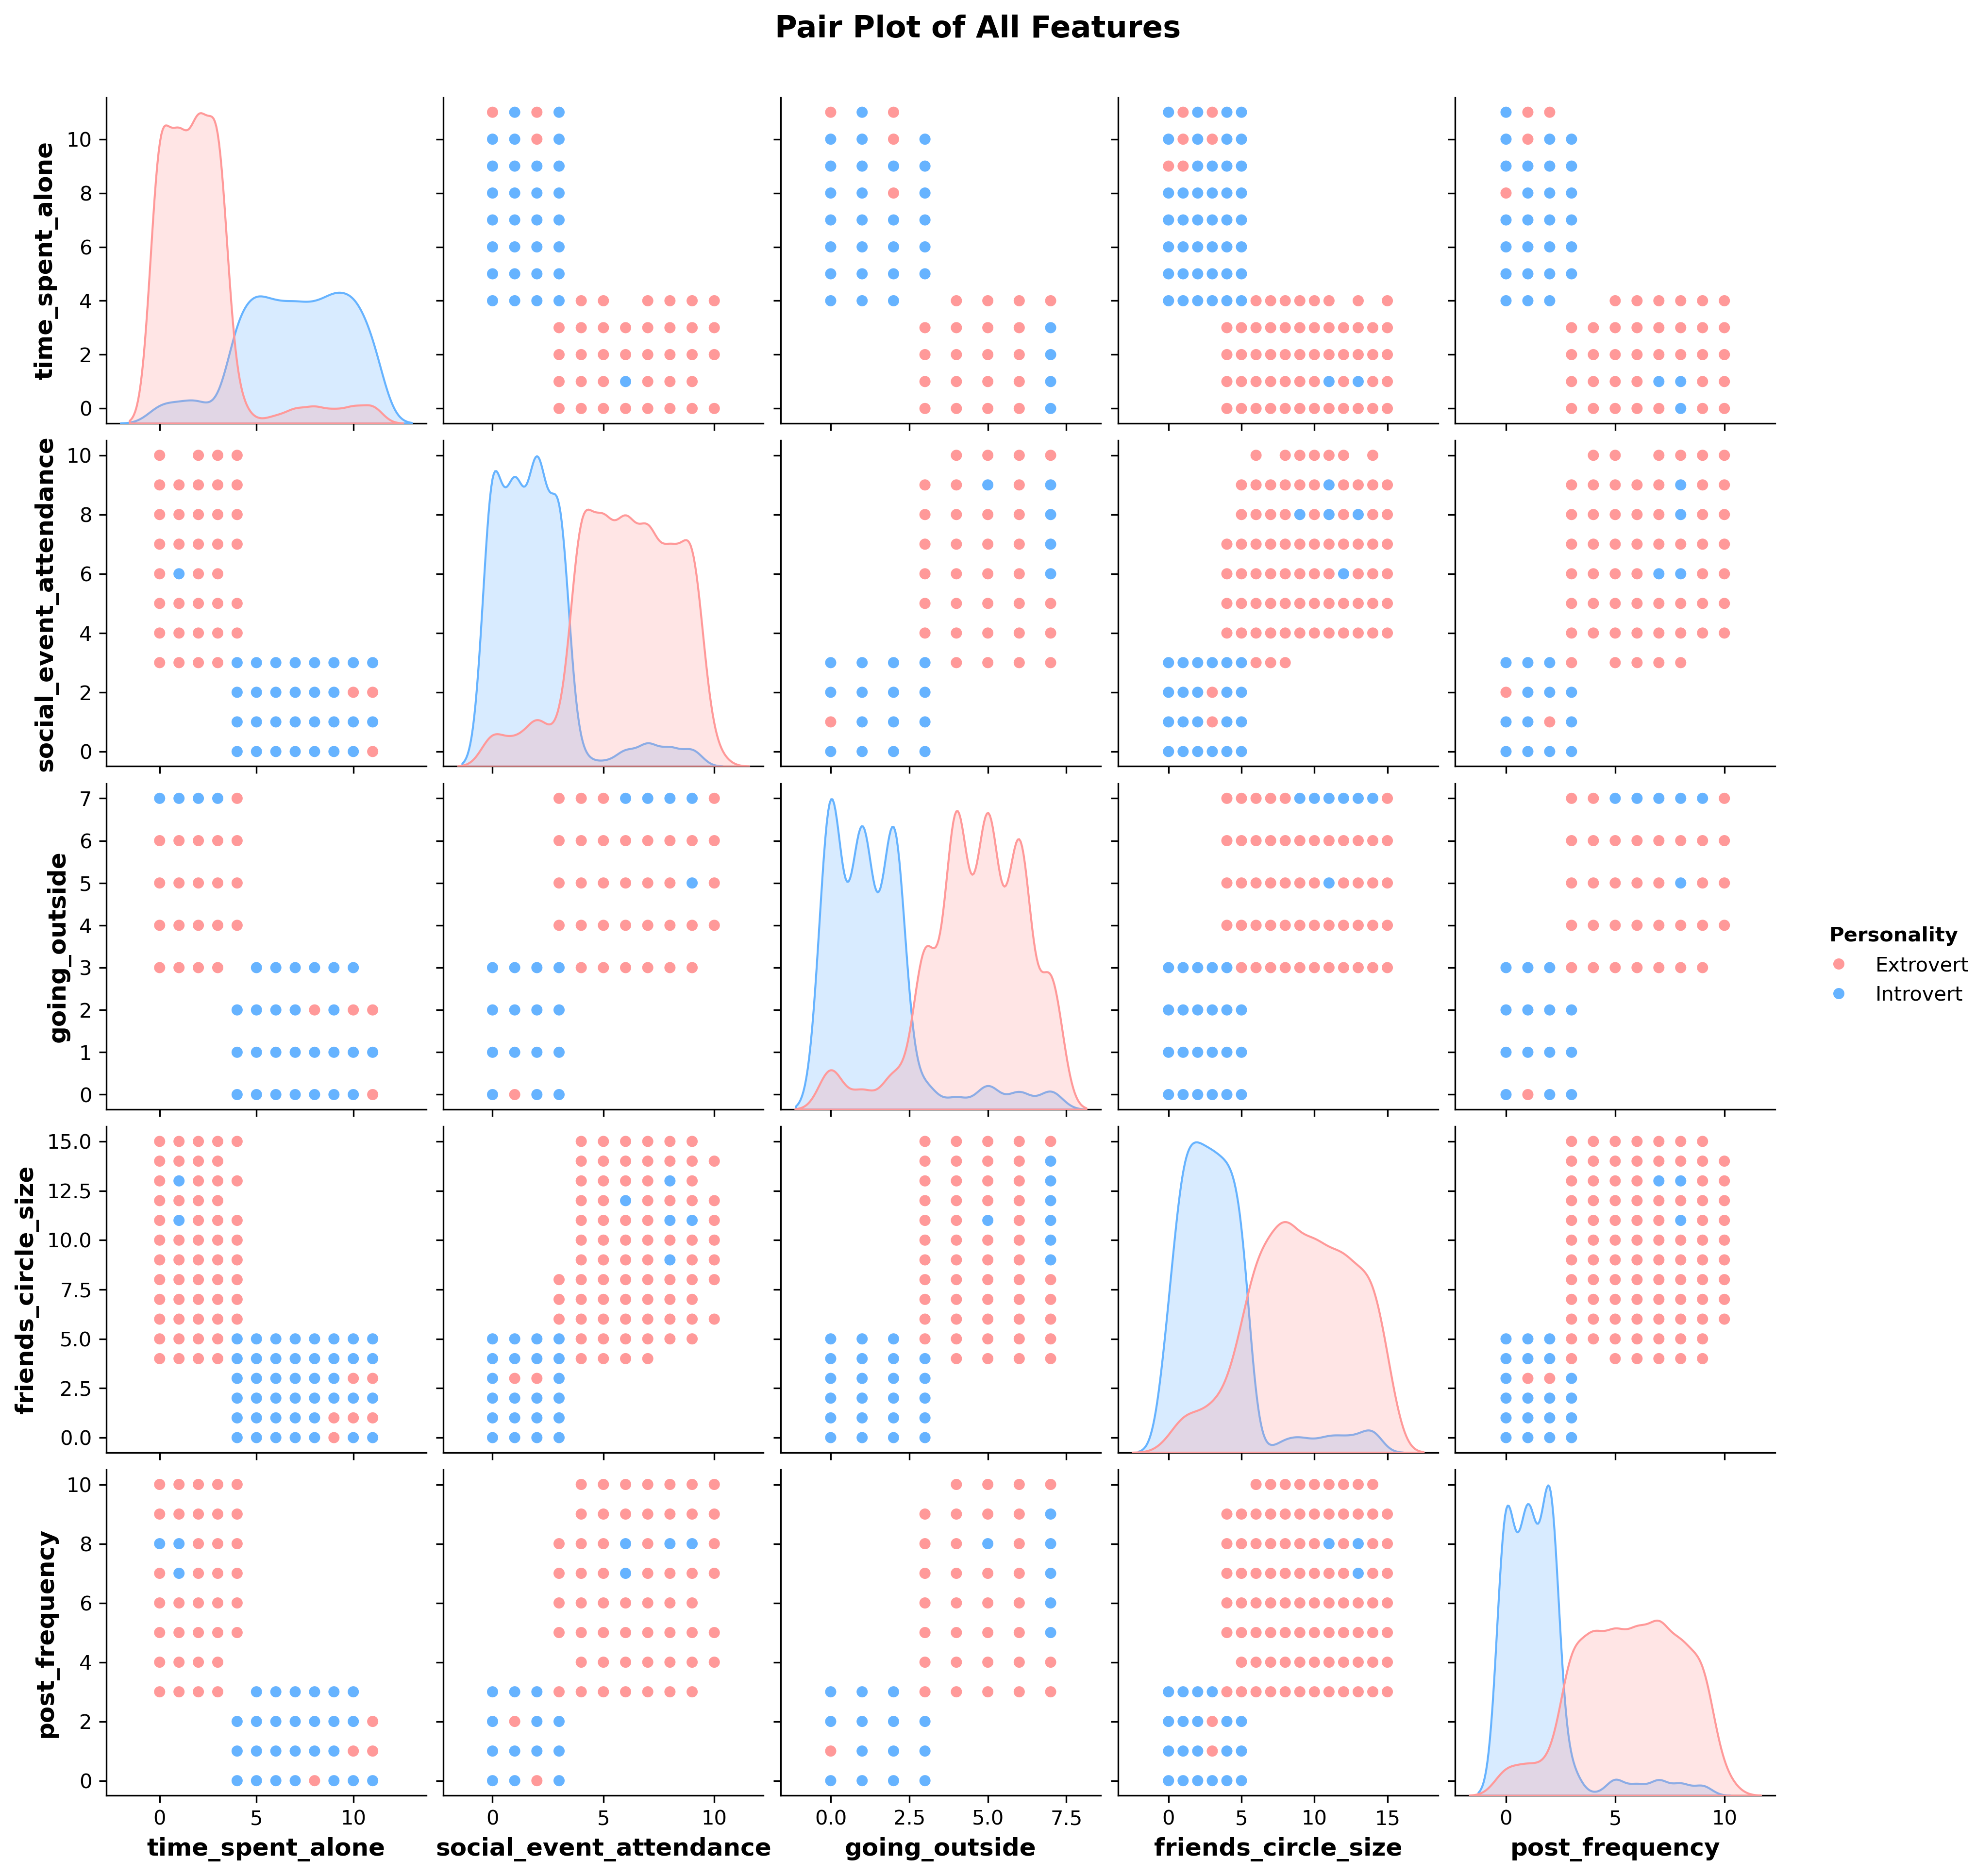

In [22]:
# Creating a pair plot for all features
g = sns.pairplot(
    data = df,
    hue = "personality",
    palette = ["#FF9999", "#66B3FF"]
)

# Adding title to the plot
plt.suptitle("Pair Plot of All Features", y = 1.03, horizontalalignment = "center", verticalalignment = "top", fontweight = 'bold')
g._legend.set_bbox_to_anchor((1, 0.5))
g._legend.set_title("Personality")
g._legend.get_title().set_fontweight('bold');

---

## **Data Preprocessing & Predictive Modeling**

In [23]:
# Suppressing warnings during model training
import warnings
warnings.filterwarnings('ignore')

# For saving the model
import joblib

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel

# Models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


# Model Selection & Evaluation Metrics
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Optimisation
import optuna
from optuna import Trial

In [24]:
# Splitting data into features (X) and target variable (y)
X = df.drop("personality", axis = 1)
y = df["personality"]

In [25]:
# List of numerical columns
numerical_features = X.select_dtypes(exclude="object").columns
numerical_features

Index(['time_spent_alone', 'social_event_attendance', 'going_outside',
       'friends_circle_size', 'post_frequency'],
      dtype='object')

In [26]:
# List of categorical columns
categorical_features = X.select_dtypes(include="object").columns
categorical_features

Index(['stage_fear', 'drained_after_socializing'], dtype='object')

In [27]:
# Encoding 'personality' column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [28]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((1758, 7), (1758,)), ((754, 7), (754,)))

In [29]:
# Pipeline for numerical features: imputation followed by scaling
numeric_pipeline = Pipeline([
    ("imputer", KNNImputer(add_indicator=True)),
    ("scaler", StandardScaler())
])

In [30]:
# Pipeline for categorical features: imputation followed by one-hot encoding
categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent", add_indicator=True)),
    ("encoder", OneHotEncoder(drop='first', sparse_output=False))
])

In [31]:
# Combining numerical and categorical feature preprocessing pipelines
preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, numerical_features),
    ("cat", categorical_pipeline, categorical_features)
], remainder="passthrough")

# Setting the transformer to return a pandas DataFrame as the output after transformation
preprocessor.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  KNNImputer(add_indicator=True)),
                                                 ('scaler', StandardScaler())]),
                                 Index(['time_spent_alone', 'social_event_attendance', 'going_outside',
       'friends_circle_size', 'post_frequency'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(add_indicator=True,
                                                                strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 Index(['stage_fear', 'drained_after_socializing'], dtype='object'))])

In [32]:
# Function to create new features
def feature_engineering(original_df):

    # Creating a copy of the original dataframe
    df = original_df.copy()

    # Feature engineering

    ## Total Social Activity: How socially active they are overall (online + offline + how many friends they have).
    df["total_social_activity"] = df["num__social_event_attendance"] + df["num__going_outside"] + df["num__friends_circle_size"]
    
    ## Alone Time Proportion: How much of their time is spent alone compared to socializing.
    df["alone_time_proportion"] = df["num__time_spent_alone"] / (df["num__time_spent_alone"] + df["total_social_activity"] + 1)
    
    ## Social Fatigue Ratio: How easily someone gets tired from social interactions.
    df["social_fatigue_ratio"] = df["cat__drained_after_socializing_Yes"] / (df["num__social_event_attendance"] + df["num__going_outside"] + 1)
    
    ## Social Comfort Index: Do they seem to handle social situations easily and often?
    df["social_comfort_index"] = (df["num__friends_circle_size"] + df["num__social_event_attendance"] + df["num__going_outside"]) / (1 + df["cat__drained_after_socializing_Yes"])
    
    ## Alone to Social Ratio: A simple comparison of how much time someone spends alone vs. being with others.
    df["alone_to_social_ratio"] = df["num__time_spent_alone"] / (df["total_social_activity"] + 1)
    
    ## Social Overload: Are they doing too much socially and feeling drained?
    df["social_overload"] = (df["num__social_event_attendance"] + df["num__going_outside"]) * df["cat__drained_after_socializing_Yes"]
    
    ## Is Socially Active (using median threshold): A simple yes/no about whether they socialize a lot.
    threshold = df["total_social_activity"].median()
    df["is_socially_active"] = (df["total_social_activity"] > threshold).astype(int)
    
    ## Online vs Offline Engagement Ratio: Do they socialize more online (like posting) or offline (like meeting in person)
    df["online_vs_offline_ratio"] = df["num__post_frequency"] / (df["num__social_event_attendance"] + df["num__going_outside"] + 1)
    
    # Perceived Social Load: How "heavy" social interaction feels to them.
    df["perceived_social_load"] = (df["cat__drained_after_socializing_Yes"] * df["total_social_activity"]) / (df["num__friends_circle_size"] + 1)
    
    ## Social Media Intensity: How much they use social media compared to the size of their friend circle.
    df["social_media_intensity"] = df["num__post_frequency"] / (df["num__friends_circle_size"] + 1)

    return df

In [33]:
# Using a Random Forest classifier as the estimator for selecting important features
feature_selector = SelectFromModel(
    RandomForestClassifier(
        n_estimators=100,
        max_depth=5,
        min_samples_leaf=5,
        random_state=101
    ), threshold='median')

# Setting the transformer to return a pandas DataFrame as the output after transformation
feature_selector.set_output(transform="pandas")

SelectFromModel(estimator=RandomForestClassifier(max_depth=5,
                                                 min_samples_leaf=5,
                                                 random_state=101),
                threshold='median')

In [34]:
# Dictionary of models to test with base/default settings
models = {
    "LogisticRegression": LogisticRegression(random_state=101),
    "SGDClassifier": SGDClassifier(loss="log_loss", random_state=101),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "SVC": SVC(probability=True, random_state=101),
    "RandomForestClassifier": RandomForestClassifier(random_state=101),
    "AdaBoostClassifier": AdaBoostClassifier(random_state=101),
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=101),
    "XGBClassifier": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=101),
    "LGBMClassifier": LGBMClassifier(verbose=-1, random_state=101),
    "CatBoostClassifier": CatBoostClassifier(logging_level='Silent', random_state=101)
}

In [35]:
# Function to evaluate model metrics
def evaluate_model(y_true, y_pred, y_pred_proba):
    """
    Function to evaluates the performance of a classification model using various metrics.

    This function calculates the following evaluation metrics:
    - Accuracy: Proportion of correctly classified instances.
    - Precision: Proportion of positive predictions that are actually positive.
    - Recall: Proportion of actual positives that are correctly identified.
    - F1-Score: Harmonic mean of precision and recall.
    - ROC AUC: Area under the Receiver Operating Characteristic curve.
    - Confusion Matrix Components: True Positive (TP), True Negative (TN), False Positive (FP), False Negative (FN).
    
    Parameters:
    - y_true : True labels of the test set.
    - y_pred : Predicted labels from the model.
    - y_pred_proba : Predicted probabilities for the positive class.

    Returns:
    - A dictionary containing the calculated evaluation metrics:
        - Accuracy
        - Precision
        - Recall
        - F1-Score
        - ROC AUC
        - True Positives (TP)
        - True Negatives (TN)
        - False Positives (FP)
        - False Negatives (FN)
    """
    
    # Calculating Accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Calculating Precision
    precision = precision_score(y_true, y_pred)

    # Calculating Recall
    recall = recall_score(y_true, y_pred)

    # Calculating F1-Score
    f1 = f1_score(y_true, y_pred)

    # Calculating ROC AUC
    roc_auc = roc_auc_score(y_true, y_pred_proba)

    # Computing confusion matrix components (TP, TN, FP, FN)
    TN, FP, FN, TP = confusion_matrix(y_true, y_pred).ravel()

    # Return all the metrics in a dictionary
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC AUC': roc_auc,
        "TP": int(TP),
        "TN": int(TN),
        "FP": int(FP),
        "FN": int(FN) 
    }


In [36]:
# Creating an instance of StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

# Dictionary to store the model performance
model_performance = {}

# Iterating through different models and storing their performance metrics
for model_name, model in models.items():
    print(f"Training started for model: {model_name}")

    # Creating a pipeline that includes pre-processing, feature engineering, feature selection, and model
    final_pipeline = Pipeline([
        ("preprocessing", preprocessor),
        ("feature_engineering", FunctionTransformer(feature_engineering)),
        ("feature_selection", feature_selector),
        ("model", model)
    ])
    
    # Fitting the pipeline on the training data
    final_pipeline.fit(X_train, y_train)
    
    # Making predictions
    y_pred = final_pipeline.predict(X_test)
    y_pred_proba = final_pipeline.predict_proba(X_test)[:, 1]  # For ROC-AUC
    
    # Performing cross-validation on the training and testing data
    training_cv_score = cross_val_score(final_pipeline, X_train, y_train, cv=skf, scoring="roc_auc")
    testing_cv_score = cross_val_score(final_pipeline, X_test, y_test, cv=skf, scoring="roc_auc")
    
    # Evaluating model performance
    metrics = evaluate_model(y_test, y_pred, y_pred_proba)
    
    # Store performance metrics for each model
    model_performance[model_name] = {
        **metrics,  # Adding model evaluation metrics
        "Avg Training CV Score": np.mean(training_cv_score),
        "Avg Testing CV Score": np.mean(testing_cv_score),
        "Training CV Score Std": np.std(training_cv_score),
        "Testing CV Score Std": np.std(testing_cv_score)
    }
    
    print(f"Training complete for model: {model_name}\n")


Training started for model: LogisticRegression
Training complete for model: LogisticRegression

Training started for model: SGDClassifier
Training complete for model: SGDClassifier

Training started for model: KNeighborsClassifier
Training complete for model: KNeighborsClassifier

Training started for model: SVC
Training complete for model: SVC

Training started for model: RandomForestClassifier
Training complete for model: RandomForestClassifier

Training started for model: AdaBoostClassifier
Training complete for model: AdaBoostClassifier

Training started for model: GradientBoostingClassifier
Training complete for model: GradientBoostingClassifier

Training started for model: XGBClassifier
Training complete for model: XGBClassifier

Training started for model: LGBMClassifier
Training complete for model: LGBMClassifier

Training started for model: CatBoostClassifier
Training complete for model: CatBoostClassifier



In [37]:
# Creating a DataFrame from the model_performance dictionary
model_perf_df = pd.DataFrame(model_performance).T
model_perf_df = model_perf_df.sort_values(by = ['ROC AUC', 'F1-Score', 'Precision', 'Recall', 'Accuracy'], ascending = False)
model_perf_df

,Accuracy,Precision,Recall,F1-Score,ROC AUC,TP,TN,FP,FN,Avg Training CV Score,Avg Testing CV Score,Training CV Score Std,Testing CV Score Std
AdaBoostClassifier,0.936340,0.927326,0.932749,0.930029,0.965359,319.0,387.0,25.0,23.0,0.946307,0.945160,0.010990,0.025467
GradientBoostingClassifier,0.936340,0.924855,0.935673,0.930233,0.964735,320.0,386.0,26.0,22.0,0.948370,0.949862,0.012509,0.013117
CatBoostClassifier,0.929708,0.918841,0.926901,0.922853,0.961552,317.0,384.0,28.0,25.0,0.947657,0.954780,0.014304,0.012710
LGBMClassifier,0.919098,0.909621,0.912281,0.910949,0.957790,312.0,381.0,31.0,30.0,0.943182,0.943305,0.013899,0.012923
XGBClassifier,0.908488,0.897959,0.900585,0.899270,0.954590,308.0,377.0,35.0,34.0,0.940043,0.944862,0.014669,0.010293
RandomForestClassifier,0.908488,0.914894,0.880117,0.897168,0.948259,301.0,384.0,28.0,41.0,0.935790,0.947675,0.012208,0.014621
KNeighborsClassifier,0.928382,0.926036,0.915205,0.920588,0.947422,313.0,387.0,25.0,29.0,0.933550,0.951780,0.008486,0.015359
SGDClassifier,0.924403,0.925373,0.906433,0.915805,0.939491,310.0,387.0,25.0,32.0,0.871160,0.932300,0.099217,0.013610
LogisticRegression,0.933687,0.926901,0.926901,0.926901,0.935641,317.0,387.0,25.0,25.0,0.922946,0.925346,0.009218,0.025721
SVC,0.936340,0.927326,0.932749,0.930029,0.931723,319.0,387.0,25.0,23.0,0.927417,0.935909,0.013180,0.011317


---

### **Selecting Models for Hyperparameter Optimization:**

- The **top 4 models** selected for hyperparameter optimization are:
    - **AdaBoostClassifier**
    - **GradientBoostingClassifier**
    - **CatBoostClassifier**
    - **KNeighborsClassifier**
- These models were chosen based on their **consistent performance across multiple evaluation metrics** and **stable cross-validation scores**.
- Hyperparameter optimization for these models will help in fine-tuning their performance to achieve even better results.

---

In [38]:
# Function to create AdaBoostClassifier model
def create_AdaBoost(trial):
    """
    Creates a AdaBoostClassifier model with hyperparameters suggested by the optuna.trial.Trial object.

    Parameters:
    - trial : optuna.trial.Trial object to suggest hyperparameters.

    Returns:
    - Instantiated AdaBoostClassifier model with suggested hyperparameters.
    """

    # Parameters
    n_estimators = trial.suggest_int("ada_n_estimators", 25, 200)
    learning_rate = trial.suggest_loguniform("ada_learning_rate", 0.0001, 0.99)
    max_depth = trial.suggest_int("base_estimator_max_depth", 3, 7)
    min_samples_split = trial.suggest_int("base_estimator_min_samples_split", 2, 20)
    base_estimator=DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split)
    
    return AdaBoostClassifier(
        estimator=base_estimator,
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        random_state=101
    )

In [39]:
# Function to create GradientBoostingClassifier model
def create_GradientBoosting(trial):
    """
    Creates a GradientBoostingClassifier model with hyperparameters suggested by the optuna.trial.Trial object.

    Parameters:
    - trial : optuna.trial.Trial object to suggest hyperparameters.

    Returns:
    - Instantiated GradientBoostingClassifier model with suggested hyperparameters.
    """
    
    # Parameters
    n_estimators = trial.suggest_int("gbm_n_estimators", 25, 200)
    learning_rate = trial.suggest_loguniform("gbm_learning_rate", 0.0001, 0.99)
    max_depth = trial.suggest_int("gbm_max_depth", 3, 7)
    min_samples_split = trial.suggest_int("base_estimator_min_samples_split", 2, 20)
    loss = trial.suggest_categorical("gbm_loss", ["log_loss", "exponential"])
    criterion = trial.suggest_categorical("gbm_criterion", ["friedman_mse", "squared_error"])
    

    return GradientBoostingClassifier(
        loss=loss,
        n_estimators=n_estimators,
        criterion=criterion,
        learning_rate=learning_rate,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=101
    )

In [40]:
# Function to create CatBoostClassifier model
def create_CatBoost(trial):
    """
    Creates a CatBoostClassifier model with hyperparameters suggested by the optuna.trial.Trial object.

    Parameters:
    - trial : optuna.trial.Trial object to suggest hyperparameters.

    Returns:
    - Instantiated CatBoostClassifier model with suggested hyperparameters.
    """
    
    # Parameters
    iterations = trial.suggest_int("cb_iterations", 25, 200)
    learning_rate = trial.suggest_loguniform("cb_learning_rate", 0.0001, 0.99)
    depth = trial.suggest_int("cb_depth", 3, 7)
    l2_leaf_reg = trial.suggest_loguniform("cb_l2_leaf_reg", 1, 10)
    border_count = trial.suggest_int("cb_border_count", 32, 255)
    
    return CatBoostClassifier(
        iterations=iterations,
        learning_rate=learning_rate,
        depth=depth,
        l2_leaf_reg=l2_leaf_reg,
        border_count=border_count,
        random_state=101,
        logging_level="Silent"
    )

In [41]:
# Function to create KNeighborsClassifier model
def create_KNNClassifier(trial):
    """
    Creates a KNeighborsClassifier model with hyperparameters suggested by the optuna.trial.Trial object.

    Parameters:
    - trial : optuna.trial.Trial object to suggest hyperparameters.

    Returns:
    - Instantiated KNeighborsClassifier model with suggested hyperparameters.
    """

    # Parameters
    n_neighbors = trial.suggest_int("knn_n_neighbors", 3, 20)
    weights = trial.suggest_categorical("knn_weights", ["uniform", "distance"])
    algorithm = trial.suggest_categorical("knn_algorithm", ["auto", "ball_tree", "kd_tree", "brute"])
    metric = trial.suggest_categorical("knn_metric", ["euclidean", "manhattan", "minkowski"])
    leaf_size = trial.suggest_int("knn_leaf_size", 20, 60)
    p = trial.suggest_categorical("knn_p", [1, 2])

    return KNeighborsClassifier(
        n_neighbors=n_neighbors,
        weights=weights,
        algorithm=algorithm,
        metric=metric,
        leaf_size=leaf_size,
        p=p
    )

In [42]:
# Function to create a model
def create_model(trial):
    """
    Selects and configures a classifier model with hyperparameters suggested by the trial object.

    Parameters:
    - trial: optuna.trial.Trial object to suggest classifier.

    Returns:
    - Instantiated classifier model
    """

    # Selecting the model to use for creating the classifier
    model_list = ["KNeighborsClassifier", "AdaBoostClassifier", "GradientBoostingClassifier", "CatBoostClassifier"]
    model_name = trial.suggest_categorical("model", model_list)

    
    if model_name == "KNeighborsClassifier":
        model = create_KNNClassifier(trial)
        
    elif model_name == "AdaBoostClassifier":
        model = create_AdaBoost(trial)
        
    elif model_name == "GradientBoostingClassifier":
        model = create_GradientBoosting(trial)
        
    elif model_name == "CatBoostClassifier":
        model = create_CatBoost(trial)

    return model

In [43]:
# Objective function for Optuna hyperparameter optimization
def objective(trial, X_train, y_train):
    """
    Optuna objective function that builds the full pipeline and returns validation F1 score.

    Parameters:
    - trial: optuna.trial.Trial object for hyperparameter suggestions.
    - X_train, y_train: training data.
    
    Returns:
    - F1 score after K-fold cross validation.
    """
    
    # Creating the model
    model = create_model(trial)

    # Creating a pipeline using the selected model
    final_pipeline = Pipeline([
        ("preprocessing", preprocessor),
        ("feature_engineering", FunctionTransformer(feature_engineering)),
        ("feature_selection", feature_selector),
        ("model", model)
    ])
    final_pipeline.set_output(transform="pandas")
    
    # Initialising StratifiedKFold for 5-fold cross-validation
    skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=101)

    # Lists to store F1 scores and ROC AUC scores for each fold
    f1_scores = []
    roc_auc_scores = []
    
    # Looping through K-folds to do Cross-validation
    for train_idx, val_idx in skf.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

        # Fitting the model on the training fold
        final_pipeline.fit(X_train_fold, y_train_fold)

        # Make predictions on the validation fold
        y_pred_proba = final_pipeline.predict_proba(X_val_fold)[:, 1]

        # Calculating ROC AUC
        roc_auc = roc_auc_score(y_val_fold, y_pred_proba)
        roc_auc_scores.append(roc_auc)
    
    # Averaging the ROC-AUC score across all folds
    avg_roc_auc = np.mean(roc_auc_scores)
    trial.set_user_attr("trained_model", final_pipeline)

    return avg_roc_auc

In [44]:
# Running the optimization process using Optuna
study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=101))
study.optimize(lambda trial: objective(trial, X_train, y_train), n_trials=75)

[I 2025-06-23 12:43:38,651] A new study created in memory with name: no-name-fa2bbae1-3b37-4457-b747-0d69c4bb70a5
[I 2025-06-23 12:43:49,162] Trial 0 finished with value: 0.9369040047583661 and parameters: {'model': 'AdaBoostClassifier', 'ada_n_estimators': 145, 'ada_learning_rate': 0.21475716044406523, 'base_estimator_max_depth': 4, 'base_estimator_min_samples_split': 18}. Best is trial 0 with value: 0.9369040047583661.
[I 2025-06-23 12:43:53,795] Trial 1 finished with value: 0.9055876707015725 and parameters: {'model': 'KNeighborsClassifier', 'knn_n_neighbors': 6, 'knn_weights': 'distance', 'knn_algorithm': 'brute', 'knn_metric': 'manhattan', 'knn_leaf_size': 21, 'knn_p': 2}. Best is trial 0 with value: 0.9369040047583661.
[I 2025-06-23 12:43:57,674] Trial 2 finished with value: 0.94427619729411 and parameters: {'model': 'KNeighborsClassifier', 'knn_n_neighbors': 12, 'knn_weights': 'uniform', 'knn_algorithm': 'kd_tree', 'knn_metric': 'euclidean', 'knn_leaf_size': 57, 'knn_p': 2}. Bes

In [45]:
# Getting the final_pipeline with best trained model
best_final_pipeline = study.best_trial.user_attrs["trained_model"]
best_final_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(add_indicator=True)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['time_spent_alone', 'social_event_attendance', 'going_outside',
       'friends_circle_size', 'post_frequency'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   Simple...
                 FunctionTransformer(func=<function feature_engineering at 0x0000026C3EA328E0>)),
                ('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier(max_depth=5,
                                                                  min_samples_leaf=5,
                                                                  random_state=101),
                                 threshold='median')),
                ('model',
                 AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                                     min_samples_split=8),
                                    learning_rate=0.017327359054608558,
                                    n_estimators=83, random_state=101))])

In [46]:
# Making predictions using the final model
y_preds = best_final_pipeline.predict(X_test)
y_proba = best_final_pipeline.predict_proba(X_test)[:, 1]

In [47]:
# Evaluating the best model
pd.Series(evaluate_model(y_test, y_preds, y_proba))

Accuracy       0.933687
Precision      0.924419
Recall         0.929825
F1-Score       0.927114
ROC AUC        0.961924
TP           318.000000
TN           386.000000
FP            26.000000
FN            24.000000
dtype: float64

In [48]:
# Checking the classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       412
           1       0.92      0.93      0.93       342

    accuracy                           0.93       754
   macro avg       0.93      0.93      0.93       754
weighted avg       0.93      0.93      0.93       754



In [49]:
# Saving the final pipeline
joblib.dump(best_final_pipeline, filename="./Artifacts/best_final_pipeline.joblib")
joblib.dump(label_encoder, filename="./Artifacts/label_encoder.joblib")

['./Artifacts/label_encoder.joblib']

In [50]:
# Example user input
user_input = {
    'time_spent_alone': 5,
    'stage_fear': 'Yes',
    'social_event_attendance': 0,
    'going_outside': 0,
    'drained_after_socializing': 'Yes',
    'friends_circle_size': 6,
    'post_frequency': 0
}

In [51]:
# Function to predict the personality
def predict_personality(input_features):
    """
    Function to predict the personality of a person based on the provided input features.
    
    Parameters:
    - input_features: Dictionary of input features for the prediction.
        
    - Returns:
        label: The predicted personality as a string label.
    """
    
    # Loading the final_pipeline and label_encoder from the Artifacts folder
    final_pipeline = joblib.load("Artifacts/best_final_pipeline.joblib")
    label_encoder = joblib.load("Artifacts/label_encoder.joblib")
    
    # Converting input dictionary to DataFrame
    input_df = pd.DataFrame([input_features])
    
    # Making prediction using the final pipeline
    prediction = final_pipeline.predict(input_df)
    
    # Converting the integer label back to the original string label using the label encoder
    predicted_label = label_encoder.inverse_transform(prediction)[0]
    return predicted_label


In [52]:
print(f"Predicted Personality: {predict_personality(user_input)}")

Predicted Personality: Introvert


In [61]:
best_final_pipeline.named_steps["feature_selection"].feature_names_in_[best_final_pipeline.named_steps["feature_selection"].get_support()]

array(['num__time_spent_alone', 'num__social_event_attendance',
       'num__going_outside', 'num__friends_circle_size',
       'num__post_frequency', 'cat__stage_fear_Yes',
       'cat__drained_after_socializing_Yes', 'total_social_activity',
       'social_fatigue_ratio', 'social_comfort_index', 'social_overload',
       'is_socially_active'], dtype=object)

In [59]:
best_final_pipeline.named_steps["feature_selection"].get_support().sum()

12

In [63]:
pd.DataFrame(data = best_final_pipeline.named_steps["model"].feature_importances_, index = best_final_pipeline.named_steps["feature_selection"].feature_names_in_[best_final_pipeline.named_steps["feature_selection"].get_support()]).to_dict()

{0: {'num__time_spent_alone': 0.04443564607941852,
  'num__social_event_attendance': 0.01422900127501466,
  'num__going_outside': 0.02421374865872362,
  'num__friends_circle_size': 0.016040787050843903,
  'num__post_frequency': 0.02106880056673656,
  'cat__stage_fear_Yes': 0.0009722487548887247,
  'cat__drained_after_socializing_Yes': 0.0,
  'total_social_activity': 0.40997072758086767,
  'social_fatigue_ratio': 0.0025075943730542716,
  'social_comfort_index': 0.4648099417613109,
  'social_overload': 0.001751503899140911,
  'is_socially_active': 0.0}}

In [ ]:
.